In [57]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq

#Read in the runlist
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

#varible for location of data, relative to this directory.
#env_var_wavefromloc ="data/waveforms/"
#pc 2
env_var_wavefromloc ="A:/DATA/waveforms/"



Defining a class for runs.  RUN(runnumber, confignumber)

In [3]:
class RUN:
    def __init__(self, runnumber, confignumber):
        self.runnumber="%05d"%(int(runnumber))
        self.config = "%03d"%(int(confignumber))

    #def _init(R 
        

In [4]:
R1=RUN(1,131)
R1.config

'131'

In [5]:
def findRun(runnumber,confignumber):
    DBinfo=Runlist.query("RN == %d"%(runnumber)   )



In [6]:
findRun(120,"131")

Fitting function for guass error

In [7]:
def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

Small Function to get Wavefrom data from an entry in a runlist 

In [8]:
def GetWaveform(RL_entry,wavenumber=11):
    DF=pd.Series()
    
    if type(RL_entry) is type(1):
        RL_entry=Runlist.iloc[np.where(Runlist["RN"] ==RL_entry)[0][0]]
    elif type(RL_entry) is not type(DF):
        print("Need runnumber as int or DF entry from runlist")

    
    Lineone=""

    waveform_loc=env_var_wavefromloc
    wavefrom_subloc=""#"%s/"%(int(RL_entry["Date"]))

    dirpath = waveform_loc+wavefrom_subloc+"%s-%s%05d"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]))
    #print(dirpath)
    if os.path.exists(dirpath):
        file="%s-%s%05d*%d.csv"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]),wavenumber)    
        flist=glob.glob(dirpath+"/"+file)        
        filename = flist[-1]#dirpath + "/" + file 
        #print(filename)
        if os.path.exists(filename):
            DF=pd.read_csv(filename,skiprows=[1])
            ofile=open(filename)
            Lineone = ofile.readlines()[1]
        else:
            print("Try new waveform")
            print(glob.glob(dirpath + "/*"))
        
        for name in DF.keys():

    
            if "(2)" in name:    
                DF=DF.rename(columns={name:name.replace(" (2)","")},errors="raise")
            elif "(B)" in name:
                
                DF=DF.rename(columns={name:"Average Cathode"},errors="raise")
            elif "(C)" in name:
                DF=DF.rename(columns={name:name.replace("average(C)","Average Anode")},errors="raise")
        DF =DF.replace([np.inf,-np.inf],np.nan)

        #print(DF.keys())
        units = Lineone.split(",")
        for i,unit in enumerate(units):
            if "(V)" in unit:               
                DF[DF.keys()[i]]=DF[DF.keys()[i]]*1000



    else:
        print("Try New Run")
        print(dirpath)


    #if != pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]):
        


    return DF



In [9]:
GetWaveform(47)

Time  Channel Trigger  Channel Cathode  Channel Anode  \
0     -10.006000              0.0         53.91855       55.25959   
1     -10.002000              0.0         58.67372       56.84055   
2      -9.998000              0.0         58.67372       58.41535   
3      -9.994000              0.0         57.08661       58.41535   
4      -9.990000              0.0         53.91855       56.84055   
...          ...              ...              ...            ...   
12497  39.981999              0.0         50.74434       66.31397   
12498  39.985999              0.0         49.15723       64.73302   
12499  39.989999              0.0         50.74434       64.73302   
12500  39.993999              0.0         52.33144       64.73302   
12501  39.997999              0.0         55.49950       64.73302   

       Average Anode  Average Cathode  
0           26.96521         38.94046  
1           27.08839         39.03474  
2           27.27951         39.05081  
3           27.50237         38.97332  
4           27.64404         38.90853  
...              ...              ...  
12497       31.40264         33.92683  
12498       31.45972         34.01522  
12499       31.59033         34.03630  
12500       31.73699         34.08352  
12501       31.83506         34.02629  

[12502 rows x 6 columns]

In [10]:
Runlist.iloc[48]

RN                                  49
Date                          20240522
Config Number                      131
Run Number                          49
Configuration          SingleGrid_20mm
type                        Production
Anode Voltage                    170.6
Cathode Voltage                   74.6
Laser Current                     27.0
Laser Frequency                    789
Media                              NaN
Target Temp Channel                NaN
Target Temperature                 NaN
Target Pressure                  16.01
TC1(K)                           294.3
TC2(K)                           294.1
TC3(K)                           294.6
Drift Length                      30.0
Filepath (GDrive)                  NaN
Filepath (ODrive)                  NaN
Filepath (server)                  NaN
window(us)                        50.0
Notes                              NaN
Name: 48, dtype: object

In [11]:
print(np.where(Runlist["RN"] ==47)[0][0])


Runlist.iloc[np.where(Runlist["RN"] ==47)[0][0]]

46


RN                                  47
Date                          20240522
Config Number                      131
Run Number                          47
Configuration          SingleGrid_20mm
type                        Production
Anode Voltage                    190.6
Cathode Voltage                   74.6
Laser Current                     27.0
Laser Frequency                    789
Media                              NaN
Target Temp Channel                NaN
Target Temperature                 NaN
Target Pressure                  16.03
TC1(K)                           294.3
TC2(K)                           294.1
TC3(K)                           294.6
Drift Length                      30.0
Filepath (GDrive)                  NaN
Filepath (ODrive)                  NaN
Filepath (server)                  NaN
window(us)                        50.0
Notes                              NaN
Name: 46, dtype: object

In [12]:
def GetWaveforms(RL_entry,count):
    
    DF=pd.DataFrame()
    Lineone=""
    DFs=[]
    wavenumbers=[]
    waveform_loc=env_var_wavefromloc
    wavefrom_subloc=""#"%s/"%(int(RL_entry["Date"]))
   
    dirpath = waveform_loc+wavefrom_subloc+"%s-%s%05d"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]))
    #print(dirpath)
    if os.path.exists(dirpath):
        file="%s-%s%05d*.csv"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"])   )
        #grab all waveforms
        flist=glob.glob(dirpath+"/"+file)        
        #print(flist)
        #loop through flist until you count wavefroms
        for i,filename in enumerate(flist):



            if i >= count:
                break    

            lastdash=filename.find("_")
            wavenumber=filename[lastdash+1:-4]
            wavenumbers.append(wavenumber)

            if os.path.exists(filename):
                DF=pd.read_csv(filename,skiprows=[1])
                ofile=open(filename)
                Lineone = ofile.readlines()[1]
            else:
                print("Try new waveform")
                print(glob.glob(dirpath + "/*"))
            
            for name in DF.keys():


                if "(2)" in name:    
                    DF=DF.rename(columns={name:name.replace(" (2)","")},errors="raise")
                elif "(B)" in name:
                    
                    DF=DF.rename(columns={name:"Average Cathode"},errors="raise")
                elif "(C)" in name:
                    DF=DF.rename(columns={name:name.replace("average(C)","Average Anode")},errors="raise")
            #print(DF.keys())
            units = Lineone.split(",")
            for i,unit in enumerate(units):
                if "(V)" in unit:               
                    DF[DF.keys()[i]]=DF[DF.keys()[i]]*1000

            DFs.append(DF)
    else:
        print("Try New Run")
        print(dirpath)


    #if != pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]):
        


    return DFs,wavenumbers


In [13]:
type(GetWaveform(Runlist.iloc[164],11)["Time"][1]),np.number

(numpy.float64, numpy.number)

In [25]:

fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Anode Voltage"
unit ="V"

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF[1:2])
    
    steps=100

    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    try:
        plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"], fmt ="", label="%s %s"%(entry[Label], unit) )
        plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"], fmt ="", label="%s %s"%(entry[Label], unit) )
    except:
        print("Iissue with run ", i)
        break
    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal dependence on %s - liquid"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-8.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

56.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         42.81496       42.63041       31.75249   

   Average Cathode  
1         37.56602  
55.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         33.29847       36.31274       31.76777   

   Average Cathode  
1         38.40388  
54.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         47.57013       53.67864       30.85797   

   Average Cathode  
1          37.9588  
53.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0          26.9562       20.52165       30.20108   

   Average Cathode  
1         38.12648  
52.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         39.64074       33.15699       29.12043   

   Average Cathode  
1         3

Text(92.09722222222221, 0.5, 'Preamp Signal [mV]')

Runs 38-42 Cathode dependence for cold gas

In [43]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [113,114]")

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


113.0
            Time  Channel Trigger  Channel Cathode  Channel Anode  Channel UV  \
0     -10.005000              0.0         17.43971       20.52165         0.0   
1     -10.001000              0.0         15.85261       20.52165         0.0   
2      -9.997000              0.0         15.85261       20.52165         0.0   
3      -9.993000              0.0         14.27165       20.52165         0.0   
4      -9.989000              0.0         14.27165       20.52165         0.0   
...          ...              ...              ...            ...         ...   
12498  39.986999              0.0         11.09744       31.57603         0.0   
12499  39.990999              0.0         12.68455       31.57603         0.0   
12500  39.994999              0.0         12.68455       31.57603         0.0   
12501  39.998999              0.0         14.27165       31.57603         0.0   
12502  40.002999              0.0         14.27165       31.57603         0.0   

       Average Anode 

Text(89.34722222222221, 0.5, 'Preamp Signal [mV]')

0 0
[0.4836559999999992, 7.99499983, 1]
([-1, -1, -5], [0.6650269999999989, 20, 5])
[0.55876636 7.92533086 0.19113206]
113 200.0
0 1
[1.3308639999999998, 4.3946666, 1]
([-1, -1, -5], [1.8299379999999996, 20, 5])
[1.79498182 4.33763514 0.06615838]
114 400.0
0 2
[1.6374719999999998, 3.99399994, 1]
([-1, -1, -5], [2.251524, 20, 5])
[ 2.12050088  3.95679371 -0.05516914]
115 600.0
0 3
[0.3909600000000012, 36.39199902, 1]
([-1, -1, -5], [0.5375700000000017, 20, 5])
[ 6.21761982e-01  3.90738285e+01 -2.32729246e-02]
116 150.0
1 0
[0.3588319999999982, 7.79399983, 1]
([-1, -1, -5], [0.49339399999999756, 20, 5])
[0.43419394 7.81133892 0.07375288]
117 200.0
1 1
[0.31501599999999996, 7.79439983, 1]
([-1, -1, -5], [0.433147, 20, 5])
[0.21294365 7.91721046 0.21523284]
118 200.0
1 2
[0.33836000000000016, 5.79199989, 1]
([-1, -1, -5], [0.4652450000000002, 20, 5])
[0.39294526 5.79146658 0.1390698 ]
119 250.0
1 3
[0.5131759999999986, 4.79199992, 1]
([-1, -1, -5], [0.705616999999998, 20, 5])
[0.53156596 4

Text(0, 0.5, 'Signal Strength [mV]')

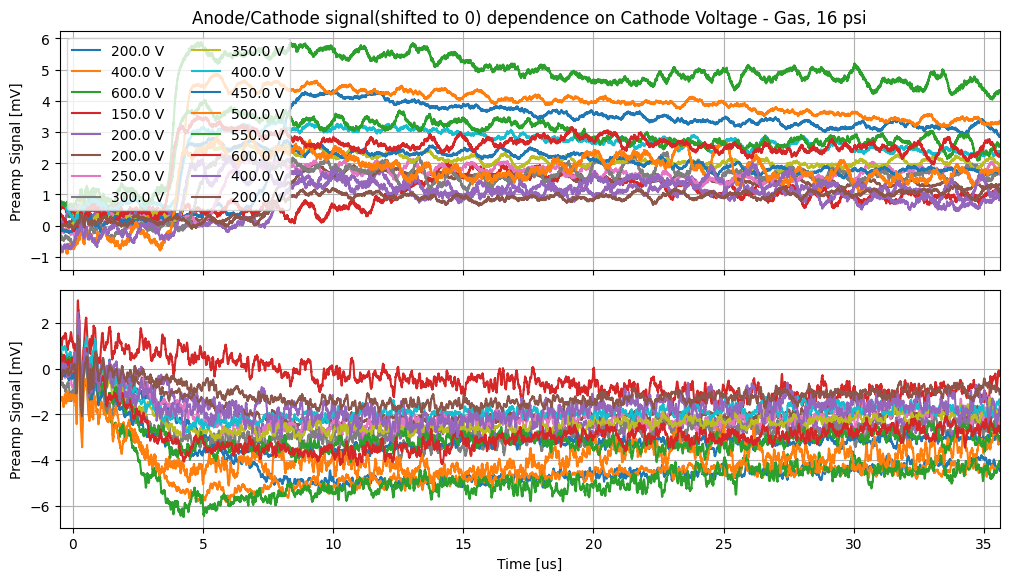

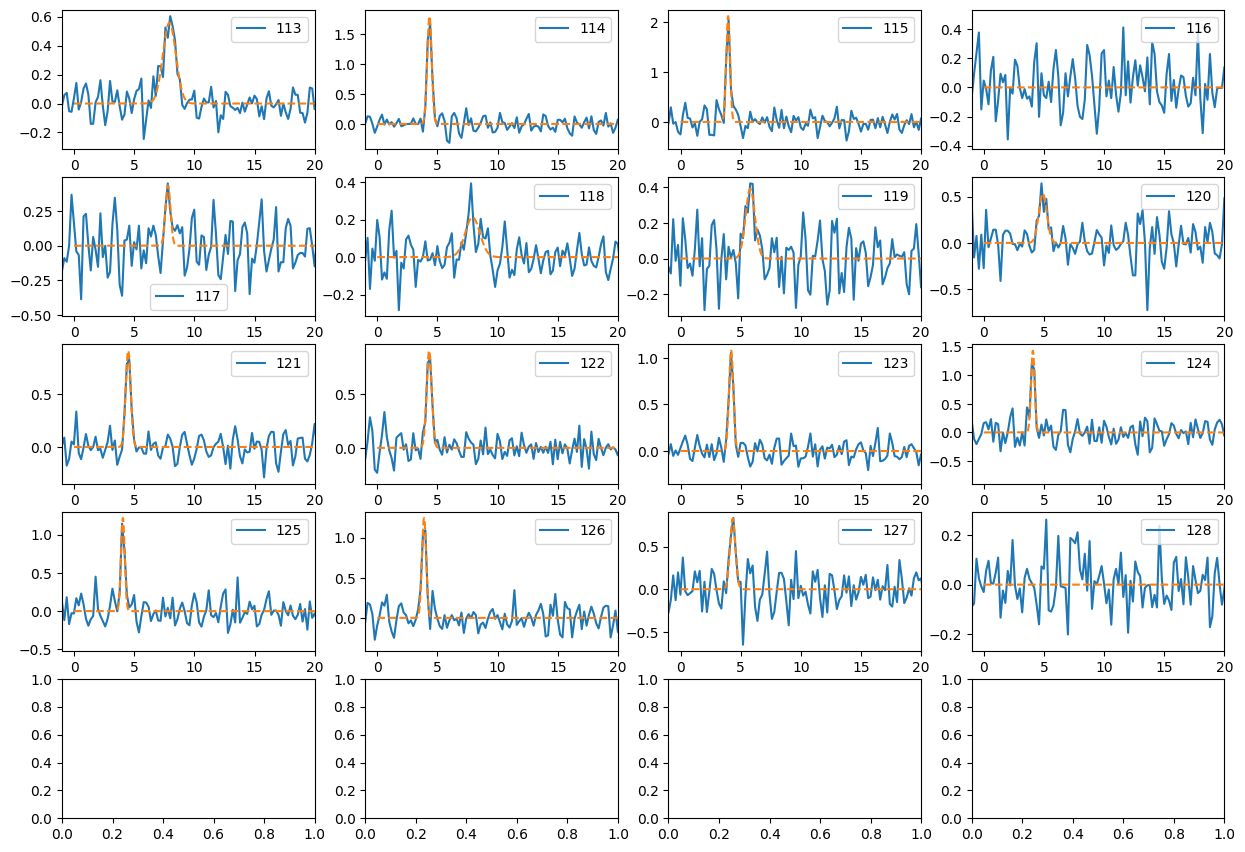

In [109]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    #print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 16 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(5,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
j=-1
k=-1
ax[1].fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [116,127]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    print(j,k)   
    ydata=run["waveform"]["Average Anode"][::50].diff()[1:-3]
    xdata=run["waveform"]["Time"][::50][1:-3]
    #print(len(ydata),len(xdata))
    bx[j][k].errorbar(x=xdata, y=ydata,label=run["info"]["RN"])
    bx[j][k].legend()

    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)

    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
        else:
            break

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)
   

    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)


    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    #print(fit_par,fit_cov)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec], c=colors[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],c=colors[sec] )
   
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
#plt.xlim(5,15)


129 600.0
[0.8520960000000003, 3.99199994, 1]
([-1, -1, -5], [1.1716320000000005, 20, 5])
[1.199481   3.92985098 0.05846059] 2.8647309804997287
[1.199481   3.92985098 0.05846059]
130 600.0
[0.7462320000000006, 3.79199995, 1]
([-1, -1, -5], [1.0260690000000008, 20, 5])
[1.05073584 3.89211209 0.05823708] 2.959322091526116
[1.05073584 3.89211209 0.05823708]
131 600.0
[0.534208000000001, 3.79199995, 1]
([-1, -1, -5], [0.7345360000000014, 20, 5])
[0.79355987 3.89920045 0.05461522] 3.231440449960574
[0.79355987 3.89920045 0.05461522]
132 600.0
[0.35919999999999846, 3.99199991, 1]
([-1, -1, -5], [0.4938999999999979, 20, 5])
[0.48514122 3.93067587 0.05946021] 3.481675867999626
[0.48514122 3.93067587 0.05946021]
133 600.0
[0.3659840000000003, 3.99199994, 1]
([-1, -1, -5], [0.5032280000000005, 20, 5])
[0.49842247 3.93135162 0.06122397] 3.473871619694864
[0.49842247 3.93135162 0.06122397]
([<matplotlib.collections.PolyCollection object at 0x000001B4C894EFD0>], ['Njoya Converted'])


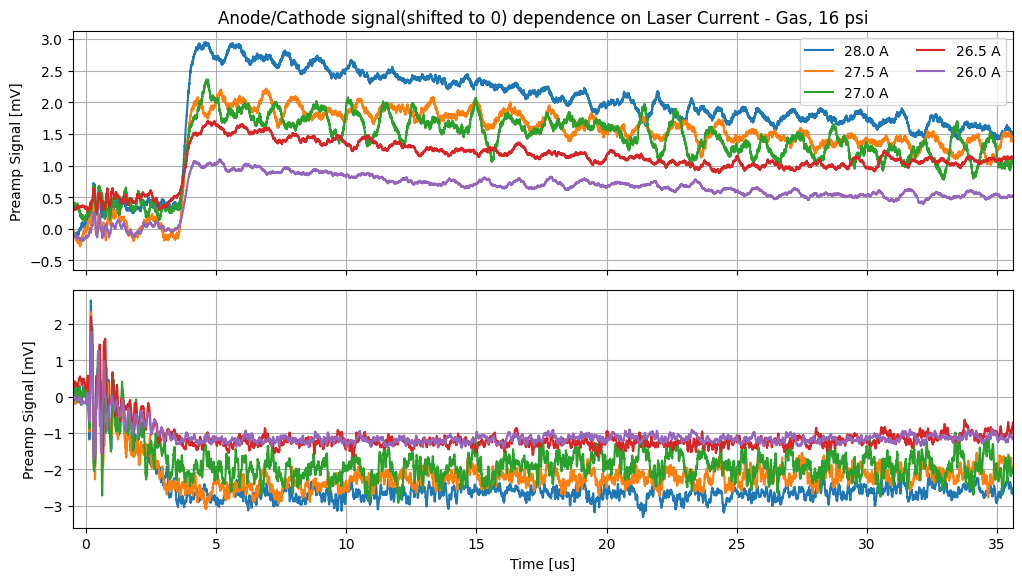

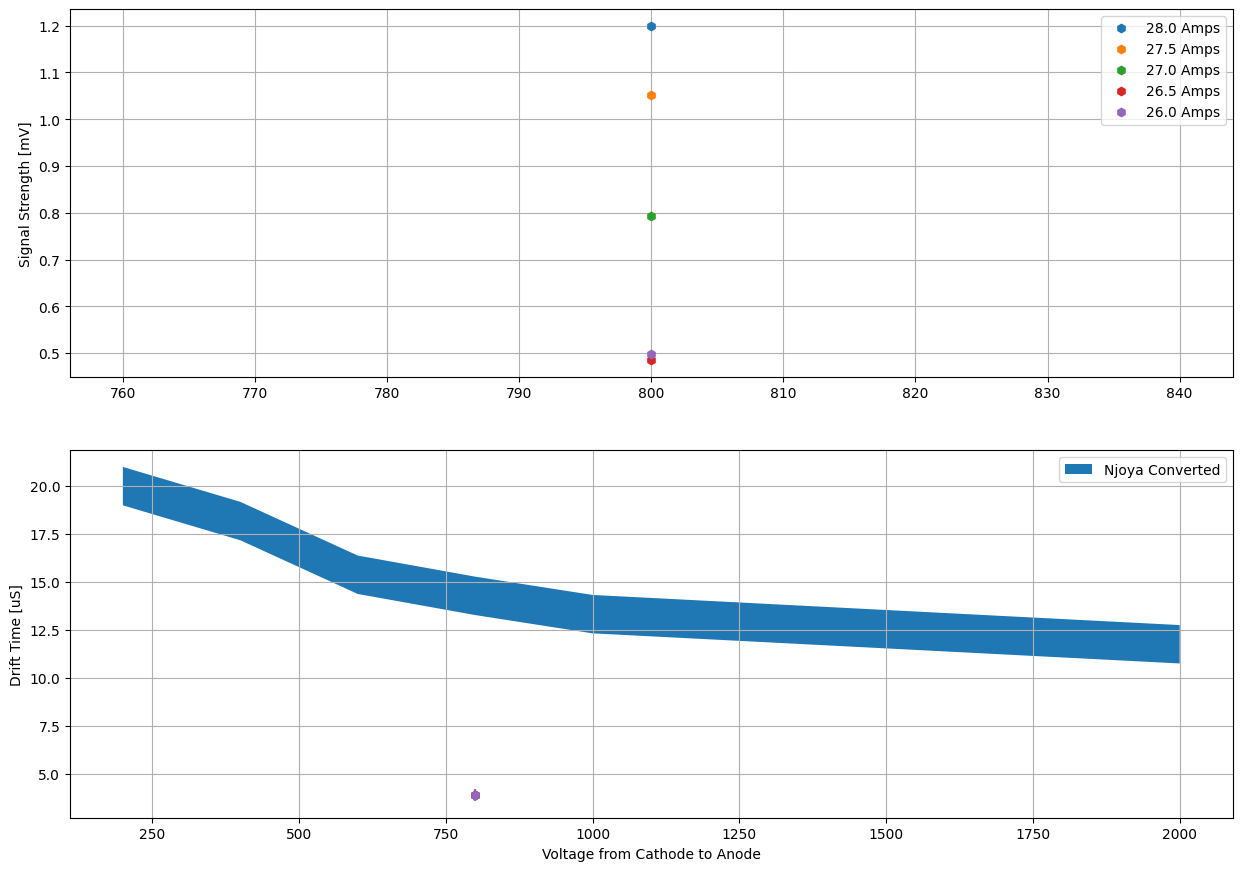

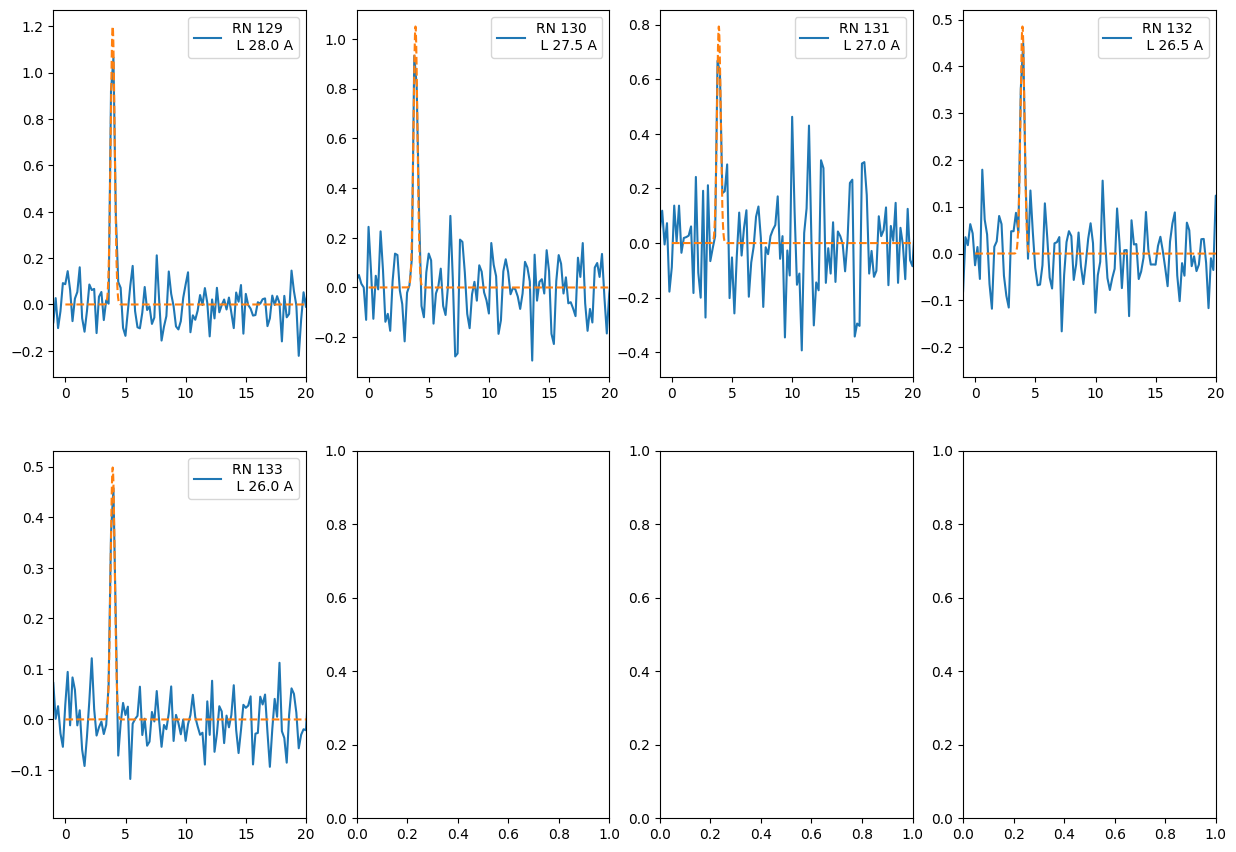

In [103]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [129,130,131,132,133,]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Laser Current"
unit ="A"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    #print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 16 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(2,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
j=-1
k=-1
ax[1].fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [116,127]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    #print(j,k)   
    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    ydata=run["waveform"]["Average Anode"][::50].diff()[1:]
    xdata=run["waveform"]["Time"][::50][1:]
    #print(len(ydata),len(xdata))
   
    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
    print(fit_par, fit_par[1] -max(ydata))
    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="RN %d \n L %s A"%(run["info"]["RN"], run["info"]["Laser Current"]) )
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)



   

    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],label="%s Amps"%(run["info"]["Laser Current"])) 
   
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
ax[1].set_xlabel("Voltage from Cathode to Anode")
ax[0].legend()
#plt.xlim(5,15)


133
134
135
136
137
138
139
140
141
142
143
144
145
146
133 600.0
[0.3659840000000003, 3.99199994, 1]
([-1, -1, -5], [0.5032280000000005, 20, 5])
[0.49842247 3.93135162 0.06122397] 3.473871619694864
[0.49842247 3.93135162 0.06122397]


134 600.0
[0.5533120000000054, 3.99199994, 1]
([-1, -1, -5], [0.7608040000000075, 20, 5])
[0.71877237 3.94816429 0.05520772] 3.2565242902626252
[0.71877237 3.94816429 0.05520772]


135 600.0
[0.536008000000001, 3.99199994, 1]
([-1, -1, -5], [0.7370110000000015, 20, 5])
[0.7249517  3.9312567  0.05196373] 3.261246700969362
[0.7249517  3.9312567  0.05196373]


136 600.0
[0.5016559999999999, 3.99199994, 1]
([-1, -1, -5], [0.6897769999999999, 20, 5])
[0.61746742 3.89062166 0.07095347] 3.263551659938038
[0.61746742 3.89062166 0.07095347]


137 600.0
[0.694744, 3.99199994, 1]
([-1, -1, -5], [0.9552730000000001, 20, 5])
[0.9484587  3.93375949 0.05814641] 3.0653294938151157


IndexError: index 4 is out of bounds for axis 0 with size 4

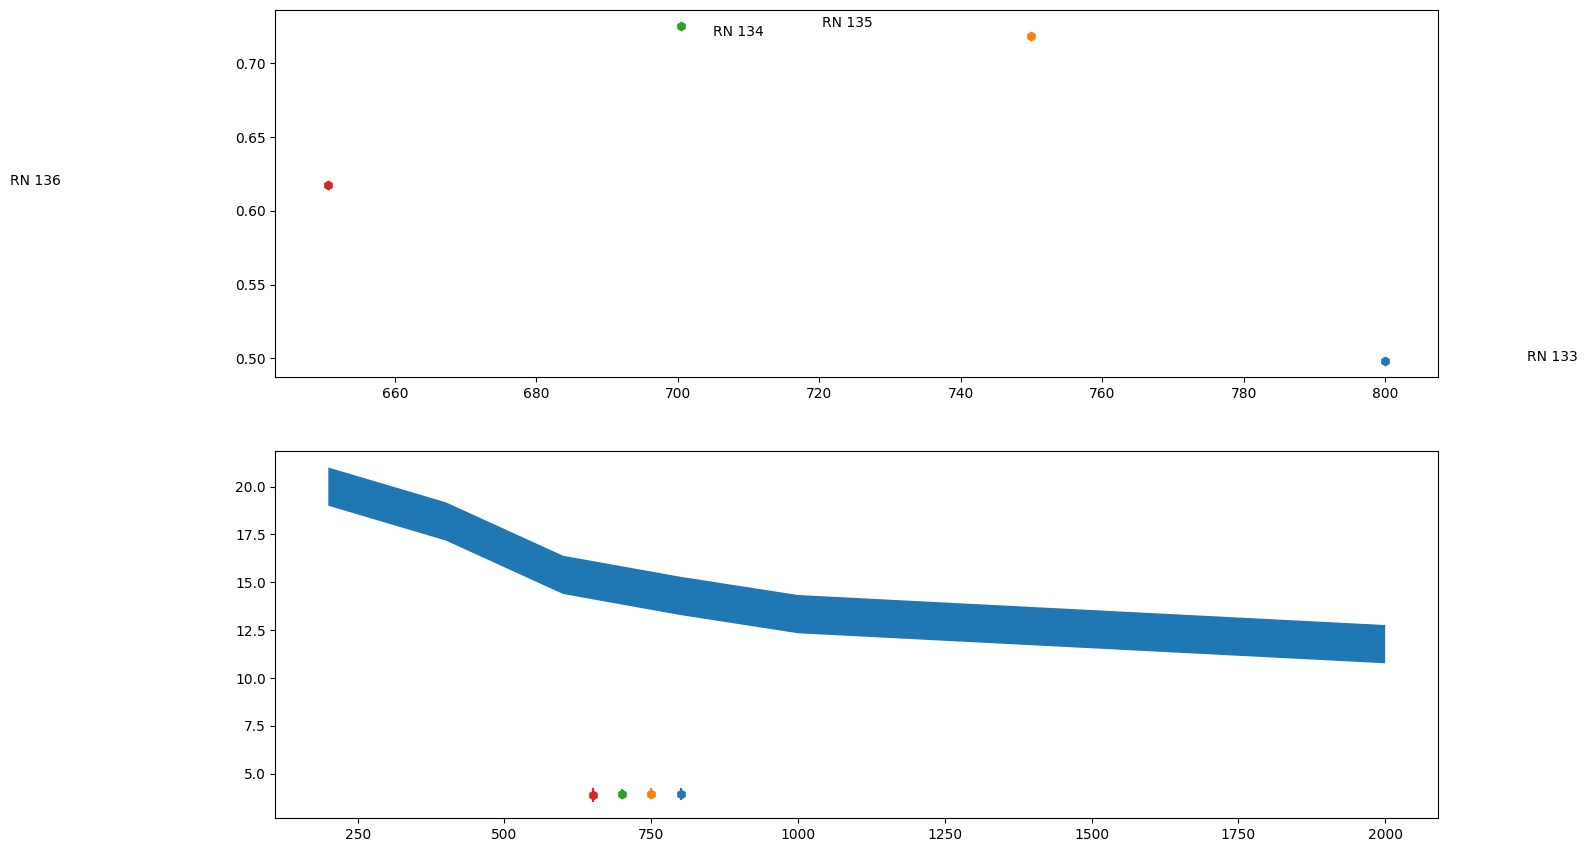

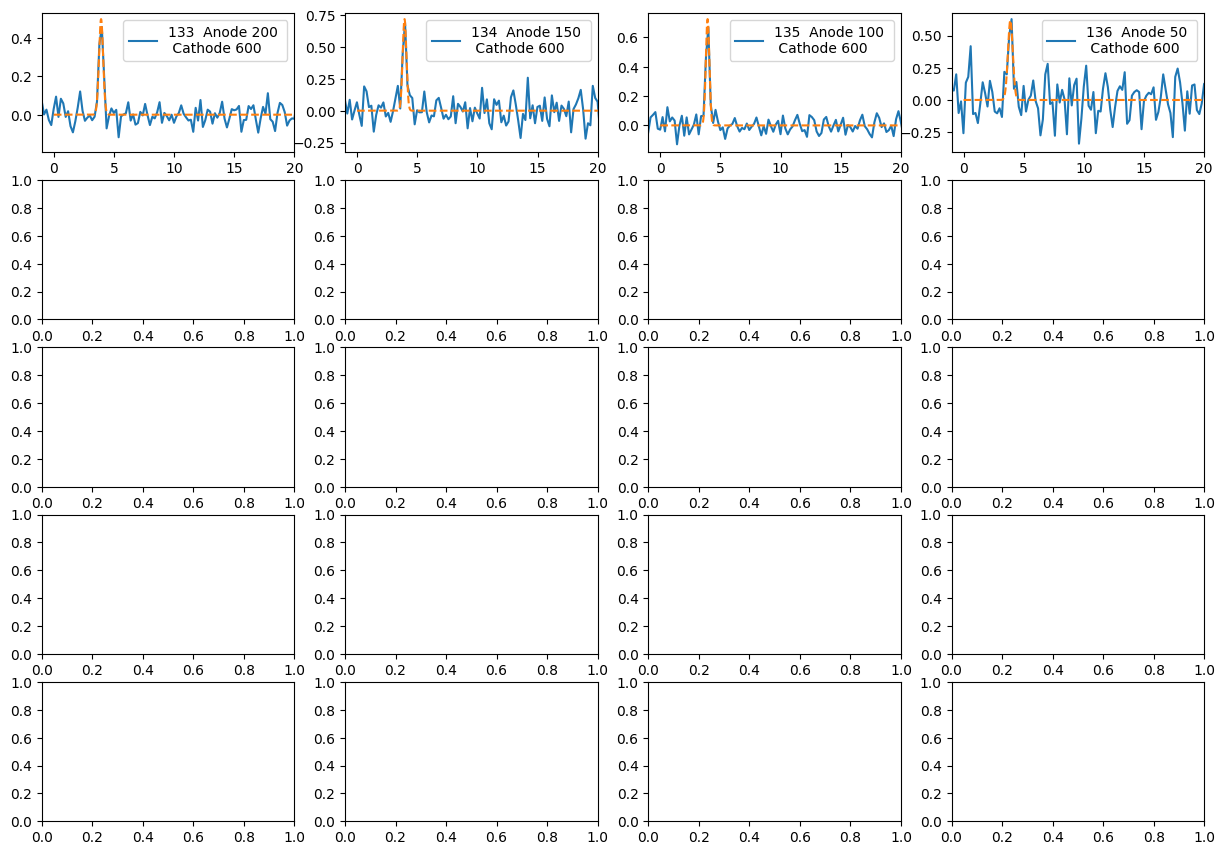

In [150]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [133,134,135,136,137,138,139,140,141,142,143,144,145,146]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    #print(entry["RN"])
    try:
        WF=GetWaveform(entry)
    except:
        print("Bad wavefrom")

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(5,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1

j=-1
k=-1
ax[1].fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [116,127]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    #print(j,k)   
    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    ydata=run["waveform"]["Average Anode"][::50].diff()[1:]
    xdata=run["waveform"]["Time"][::50][1:]
    #print(len(ydata),len(xdata))
   
    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
    print(fit_par, fit_par[1] -max(ydata))
    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)



   

    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],label="%i  Anode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"]))
    adj=0
    if i%2==0:
        adj=65
    else:
        adj=0
    if run["info"]["RN"]==143:
        adj=0
    ax[0].text(run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"]-45+adj,run["Waveform_amp"], "RN %d"%(run["info"]["RN"]))
    print("\n")
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
ax[0].legend(ncol=3)
ax[0].set_xlim(0,650)
ax[0].set_title("Anode Dep @ 16 psi")
ax[1].set_xlabel("Voltage from Cathode to Anode")
ax[1].set_xlim(0,650)
#plt.xlim(5,15)


In [209]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [33,34,35,36,37,38,39,40,41,42,47,62,63,147,150,151,152,153,154,155,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186]")#,147,148,149,150,151,138,122,113,120,124,152,153,154,155,156]") #147,148,149,150,151,138,122,113,120,124,152,153,154,155

#35,36,37,,100,102,103


run num   33
33
run num   34
34
run num   35
35
run num   36
36
run num   37
37
run num   38
38
run num   39
39
run num   40
40
run num   41
41
run num   42
42
run num   47
47
run num   62
62
run num   63
63
run num   147
147
run num   150
150
run num   151
151
run num   152
152
run num   153
153
run num   154
154
run num   155
155
run num   168
168
run num   169
169
run num   170
170
run num   171
171
run num   172
172
run num   173
173
run num   174
174
run num   175
175
run num   176
176
run num   177
177
run num   178
178
run num   179
179
run num   180
180
run num   181
181
run num   182
182
run num   183
183
run num   184
184
run num   185
185
run num   186
186
run num   186
186
 step
Run  33
[8.193717800000002, 15.10399964, 2.85999992] 
 ([-1, -1, -50], [12.290576700000003, 45, 50])
[ 8.70066099 15.04766637  0.27595285] 
 [[ 3.47926074e-04  5.97585669e-12 -7.35662029e-06]
 [ 5.97585669e-12  3.73319753e-06 -1.89491849e-13]
 [-7.35662029e-06 -1.89491849e-13  4.66649691e-07]]


Run

Text(0.5, 0, 'Voltage from Cathode to Grid')

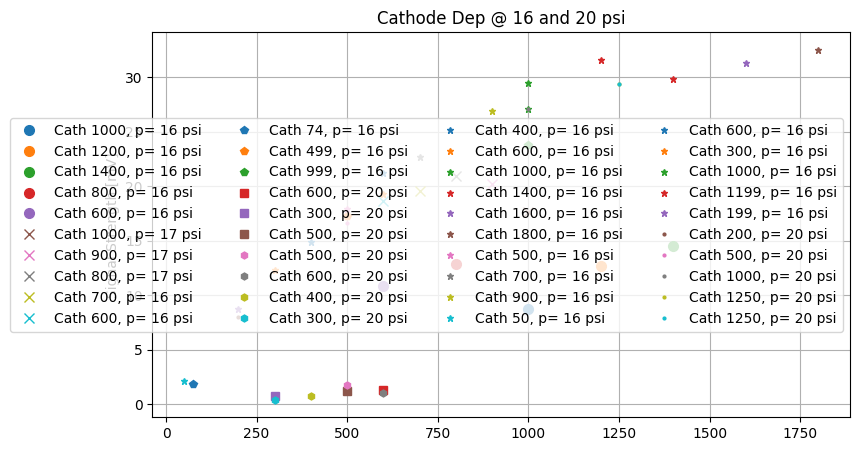

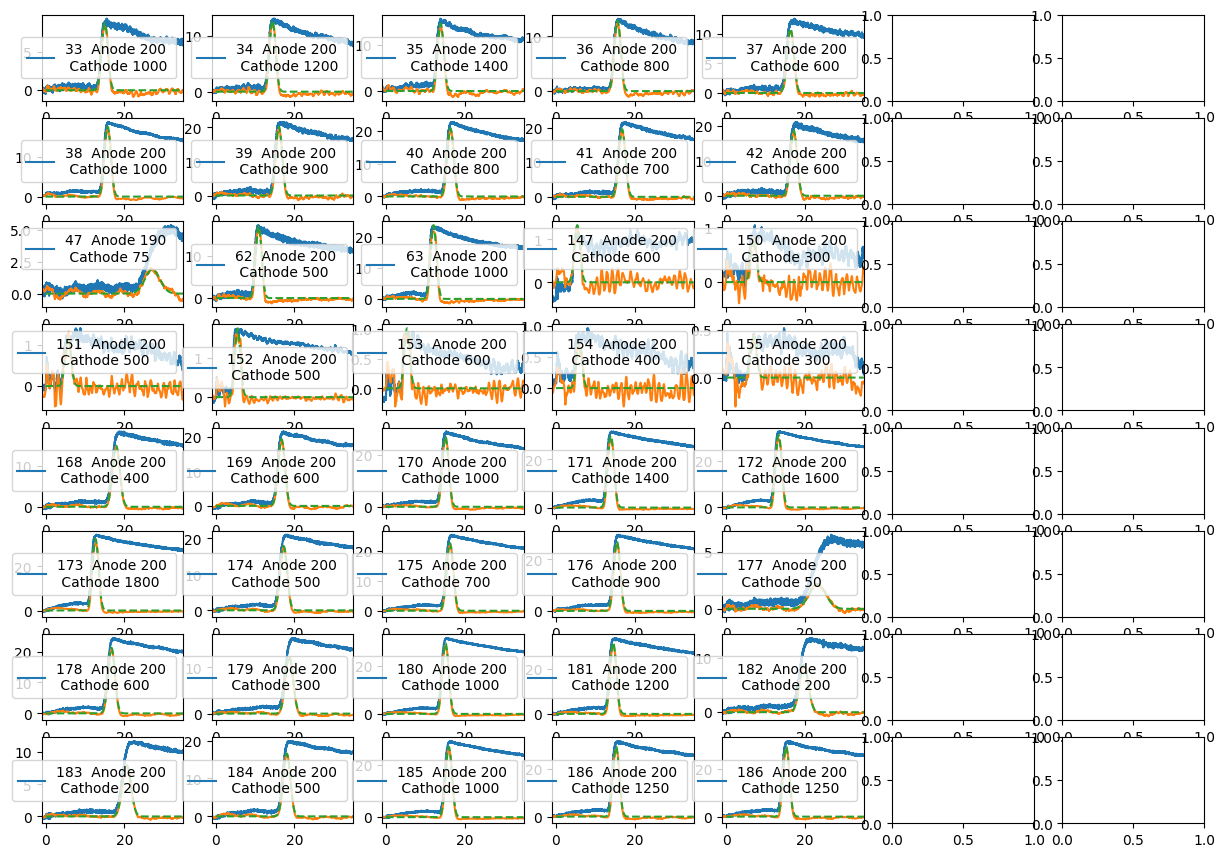

In [215]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
  

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots.errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    #plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots.grid(True)
#plots[0].set_xlabel("Time [us]")
plots.set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)

print(" step")
#plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots.legend(ncol=4)

#plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
#plots[1].grid(True)
plots.set_xlabel("Time [us]")
#plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(1, 1, figsize=(9,5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(8,7, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey","green","cyan","purple","teal"]
marker=["o","x","p","s","h","*","."]
markersize=7

sec=0
njoya_y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=[100*2,200*2,300*2,400*2,500*2,1000*2]
ax.fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    print("Run ",rn)
    if run["info"]["RN"] in [38,47,113,147,152,168,183]:
        sec+=1

    if i%5==0:
        j=j+1
    if i%5==0:
        k=0    
    #print(j,k)   

    #Fitting update June 3rd - Use a rolling mean to smooth out the orignal data then pipe that rolling mean into a diff. I then fit the diff with a guassian function (amp, mean, stdev)
    stepsize=50
    diffsize=500

    xdata=run["waveform"]["Time"]
    ydata=run["waveform"]["Average Anode"]-np.average(run["waveform"]["Average Anode"][:20])
    yrolling=ydata.rolling(stepsize).mean()
    yprime=yrolling.diff(diffsize)

    timesteps=[ t for t in xdata[::diffsize]]

    amp_guess= np.max(yprime)
    delay_guess_index= np.where(yprime==amp_guess)[0]
    time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
    amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

    sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
    delay_guess=xdata[delay_guess_index]
    p0s=[amp_guess,delay_guess.iloc[0],sigma_guess]
  

    limits=([-1,-1,-50],[max(yprime.fillna(0))*1.5,45,50])
    print(p0s,"\n",limits)

    fit_par,fit_cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0s,bounds=limits)
    
    print(fit_par,"\n",fit_cov)
    xfit=np.arange(-10,40,0.1)
    yfit=gaussian(xfit,fit_par[0],fit_par[1],fit_par[2])
  
    


    if fit_par[0] <=0 or fit_cov[1][1] > 4e-1:
        print("Orginal fit")
        print(fit_par)
        print(fit_cov)

    
    for step_fix in [500,750]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 1e-1:
            p0s[1]=8
            print("Bad fit")
            print(fit_par[0] <=0 , fit_cov[1][1])
            ydata=run["waveform"]["Average Anode"].rolling(20).mean().diff(step_fix)
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,35,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[j][k].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[j][k].errorbar(x=xdata, y=yprime)
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,35,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,35)
    

    
   # print(fit_par)
   # print(fit_cov)
    if rn in [33,38,47,113,147,152,168,183]:
        psi = run["info"]["Target Pressure"]
        if rn == 47:
            cgt=1
        else:
            cgt=0
        cgtag=["","Cold Gas"]
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5,c=colors[sec],markersize=markersize-sec*0.5,fmt =marker[sec],label="%d psi on %d %s"%(psi,run["info"]["Date"],cgtag[cgt]) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5,c=colors[sec], fmt =marker[sec])
    cx.errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],markersize=markersize-sec*0.5,label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
    k=k+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())

ax.legend()
ax.grid()
ax.set_ylabel("Drift Time [uS]")

#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
#cx.set_xlim(0,850)
cx.set_title("Cathode Dep @ 16 and 20 psi")
#ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Grid")
#plt.xlim(5,15)


[4.3935036, 2.02342857, 3.02399991]
[ 4.53876486  1.57109447 -0.28504112] 
 [[2.42098202e-04 8.49352342e-13 1.01358217e-05]
 [8.49352342e-13 1.01844502e-05 5.34321492e-14]
 [1.01358217e-05 5.34321492e-14 1.27305629e-06]]
251 251
2.1469414484984775


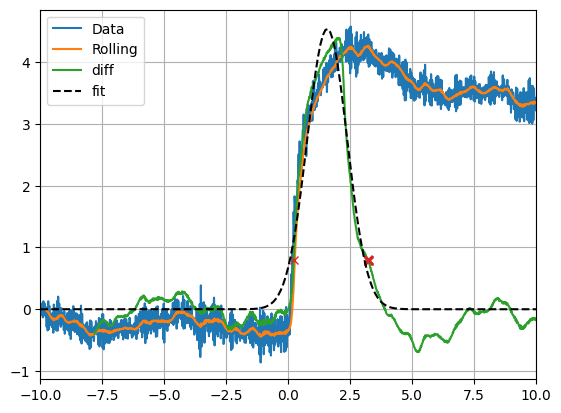

In [271]:
DF=GetWaveform(89)

stepsize=50
diffsize=500

xdata=DF["Time"]
ydata=DF["Average Anode"]-np.average(DF["Average Anode"][:20])
yrolling=ydata.rolling(stepsize).mean()
yprime=yrolling.diff(diffsize)

timesteps=[ t for t in xdata[::diffsize]]

amp_guess= np.max(yprime)
delay_guess_index= np.where(yprime==amp_guess)[0]
time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
delay_guess=xdata[delay_guess_index]
p0=[amp_guess,delay_guess.iloc[0],sigma_guess]
par,cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0)
print(p0)
print(par,"\n",cov)
xfit=np.arange(-10,40,0.1)
yfit=gaussian(xfit,par[0],par[1],par[2])



plt.errorbar(x=xdata, y=ydata, label="Data")
plt.errorbar(x=xdata, y=yrolling, label="Rolling")
plt.errorbar(x=xdata, y=yprime, label="diff")
#plt.errorbar(x=timesteps, y = 10 * np.array(timesteps)/np.array(timesteps), fmt="x", label="Diff stepsize")

plt.errorbar(x=time_82,y=amp_82,fmt="x")
plt.errorbar(x=xfit, y=yfit,c="black",fmt = "--", ms=9,label ="fit")


print(len(DF["Time"][::stepsize]),len(DF["Average Anode"][::stepsize].diff(diffsize)))

plt.grid(True)
plt.legend()
plt.xlim(-10,10)

print(np.average(DF["Average Anode"].rolling(stepsize).mean().dropna())-np.average(DF["Average Anode"][:20]))


In [245]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186]")#,147,148,149,150,151,138,122,113,120,124,152,153,154,155,156]") #147,148,149,150,151,138,122,113,120,124,152,153,154,155


fig, plots = plt.subplots(1, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
  

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots.errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    #plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots.grid(True)
#plots[0].set_xlabel("Time [us]")
plots.set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)

print(" step")
#plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots.legend(ncol=4)

#plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
#plots[1].grid(True)
plots.set_xlabel("Time [us]")
#plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(1, 1, figsize=(9,5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(5,5, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["o","x","p","s","h","*"]
markersize=7

sec=0
njoya_y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=[100*2,200*2,300*2,400*2,500*2,1000*2]
ax.fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    print("Run ",rn)
    if run["info"]["RN"] in [38,47,113,147,152,168,176,183]:
        sec+=1

    if i%5==0:
        j=j+1
    if i%5==0:
        k=0    
    #print(j,k)   

    #Fitting update June 3rd - Use a rolling mean to smooth out the orignal data then pipe that rolling mean into a diff. I then fit the diff with a guassian function (amp, mean, stdev)
    stepsize=50
    diffsize=500

    xdata=run["waveform"]["Time"]
    ydata=run["waveform"]["Average Anode"]-np.average(run["waveform"]["Average Anode"][:20])
    yrolling=ydata.rolling(stepsize).mean()
    yprime=yrolling.diff(diffsize)

    timesteps=[ t for t in xdata[::diffsize]]

    amp_guess= np.max(yprime)
    delay_guess_index= np.where(yprime==amp_guess)[0]
    time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
    amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

    sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
    delay_guess=xdata[delay_guess_index]
    p0s=[amp_guess,delay_guess.iloc[0],sigma_guess]
  

    limits=([-1,-1,-50],[max(yprime.fillna(0))*1.5,45,50])
    print(p0s,"\n",limits)

    fit_par,fit_cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0s,bounds=limits)
    
    print(fit_par,"\n",fit_cov)
    xfit=np.arange(-10,40,0.1)
    yfit=gaussian(xfit,fit_par[0],fit_par[1],fit_par[2])
  
    


    if fit_par[0] <=0 or fit_cov[1][1] > 4e-1:
        print("Orginal fit")
        print(fit_par)
        print(fit_cov)

    
    for step_fix in [500,750]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 1e-1:
            p0s[1]=8
            print("Bad fit")
            print(fit_par[0] <=0 , fit_cov[1][1])
            ydata=run["waveform"]["Average Anode"].rolling(20).mean().diff(step_fix)
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,35,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[j][k].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[j][k].errorbar(x=xdata, y=yprime)
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,35,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,35)
    

    
   # print(fit_par)
   # print(fit_cov)
    if rn in [33,38,47,113,147,152,168,176,183]:
        psi = run["info"]["Target Pressure"]
        if rn == 47:
            cgt=1
        else:
            cgt=0
        cgtag=["","Cold Gas"]
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5,c=colors[sec],markersize=markersize-sec*0.5,fmt =marker[sec],label="%d psi on %d %s"%(psi,run["info"]["Date"],cgtag[cgt]) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5,c=colors[sec], fmt =marker[sec])
    cx.errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],markersize=markersize-sec*0.5,label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
    k=k+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())

ax.legend()
ax.grid()
ax.set_ylabel("Drift Time [uS]")

#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
#cx.set_xlim(0,850)
#cx.set_title(")
#ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Grid")
#plt.xlim(5,15)

#35,36,37,,100,102,103


ParserError: Error tokenizing data. C error: Expected 23 fields in line 208, saw 37


#### Comparison runs on June 4th and 5th

run num   183
183
run num   184
184
run num   185
185
run num   186
186
run num   189
189
run num   190
190
run num   191
191
run num   192
192
run num   193
193
run num   194
194
run num   195
195
run num   196
196
run num   197
197
run num   198
198
run num   199
199
run num   200
200
run num   201
201
run num   202
202
run num   203
203
run num   204
204
run num   205
205
run num   206
206
run num   207
207
run num   208
208
run num   209
209
run num   210
210
run num   211
211
run num   212
212
run num   213
213
run num   214
214
 step
Run  183
0 0
[7.906298, 20.57199947, 4.079999879999999] 
 ([-1, -1, -50], [11.859447, 45, 50])
[ 7.994017   20.60024889  0.38503542] 
 [[ 9.91120455e-05  2.53848892e-12 -3.18251745e-06]
 [ 2.53848892e-12  2.45259820e-06 -1.22324746e-13]
 [-3.18251745e-06 -1.22324746e-13  3.06574775e-07]]


Run  184
1 0
[16.2549442, 18.08399954, 3.2759999099999995] 
 ([-1, -1, -50], [24.382416300000003, 45, 50])
[16.59994798 18.05903555  0.31493598] 
 [[ 4.59800079e-0

Text(0.5, 0, 'Voltage from Cathode to Grid')

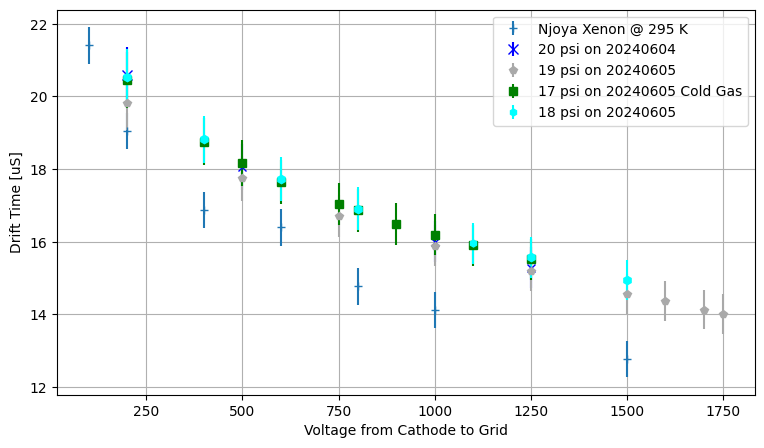

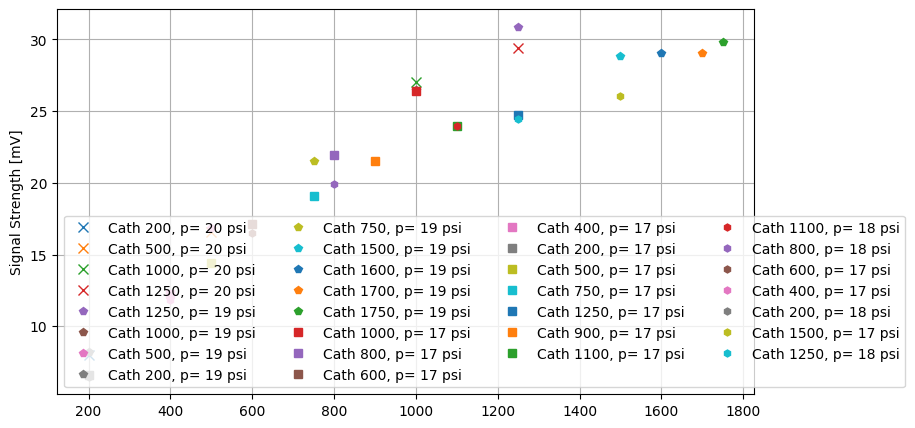

In [116]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [183,184,185,186,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212 ,213,214]")#,147,148,149,150,151,138,122,113,120,124,152,153,154,155,156]") #147,148,149,150,151,138,122,113,120,124,152,153,154,155


fig, plots = plt.subplots(1, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
  

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots.errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    #plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots.grid(True)
#plots[0].set_xlabel("Time [us]")
plots.set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)

print(" step")
#plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots.legend(ncol=4)

#plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
#plots[1].grid(True)
plots.set_xlabel("Time [us]")
#plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(1, 1, figsize=(9,5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(7,7, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["o","x","p","s","h","*"]
markersize=7

sec=0
njoya_y1=20/njy -0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y=20/njy
njoya_y2=20/njy +0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=njx*2 #[100*2,200*2,300*2,400*2,500*2,1000*2]
ax.errorbar(x=njoya_x,y=njoya_y,yerr=0.5,fmt=" ",marker="+",label="Njoya Xenon @ 295 K")
j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    print("Run ",rn)
    if run["info"]["RN"] in [38,47,113,147,152,168,176,183,189,198,208]:
        sec+=1

    if i%7==0:
        k=k+1
    if i%7==0:
        j=0    
    print(j,k)   

    #Fitting update June 3rd - Use a rolling mean to smooth out the orignal data then pipe that rolling mean into a diff. I then fit the diff with a guassian function (amp, mean, stdev)
    stepsize=50
    diffsize=500

    xdata=run["waveform"]["Time"]
    ydata=run["waveform"]["Average Anode"]-np.average(run["waveform"]["Average Anode"][:20])
    yrolling=ydata.rolling(stepsize).mean()
    yprime=yrolling.diff(diffsize)

    timesteps=[ t for t in xdata[::diffsize]]

    amp_guess= np.max(yprime)
    delay_guess_index= np.where(yprime==amp_guess)[0]
    time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
    amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

    sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
    delay_guess=xdata[delay_guess_index]
    p0s=[amp_guess,delay_guess.iloc[0],sigma_guess]
  

    limits=([-1,-1,-50],[max(yprime.fillna(0))*1.5,45,50])
    print(p0s,"\n",limits)

    fit_par,fit_cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0s,bounds=limits)
    
    print(fit_par,"\n",fit_cov)
    xfit=np.arange(-10,40,0.1)
    yfit=gaussian(xfit,fit_par[0],fit_par[1],fit_par[2])
  
    


    if fit_par[0] <=0 or fit_cov[1][1] > 4e-1:
        print("Orginal fit")
        print(fit_par)
        print(fit_cov)

    
    for step_fix in [500,750]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 1e-1:
            p0s[1]=8
            print("Bad fit")
            print(fit_par[0] <=0 , fit_cov[1][1])
            ydata=run["waveform"]["Average Anode"].rolling(20).mean().diff(step_fix)
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,35,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[k][j].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[k][j].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[k][j].errorbar(x=xdata, y=yprime)
    bx[k][j].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,35,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[k][j].errorbar(x=xfit, y=yfit,fmt="--")
    bx[k][j].set_xlim(-1,35)
    

    
   # print(fit_par)
   # print(fit_cov)
    if rn in [33,38,47,113,147,152,168,176,183,189,198,208]:
        psi = run["info"]["Target Pressure"]
        if rn == 198:
            cgt=1
        else:
            cgt=0
        cgtag=["","Cold Gas"]
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*2,c=colors[sec],markersize=markersize-sec*0.5,fmt =marker[sec],label="%d psi on %d %s"%(psi,run["info"]["Date"],cgtag[cgt]) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*2,c=colors[sec], fmt =marker[sec])
    cx.errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],markersize=markersize-sec*0.5,label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
    j=j+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())

ax.legend()
ax.grid()
ax.set_ylabel("Drift Time [uS]")

#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
#cx.set_xlim(0,850)
#cx.set_title(")
#ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Grid")
#plt.xlim(5,15)

#35,36,37,,100,102,103


In [96]:
xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.22)[0]]# and abs(yprime -amp_guess)/amp_guess >=0.195
xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.22)[0]].iloc[-1]



17.79999955

run num   157
run num   158
run num   159
run num   160
run num   161
run num   162
run num   163


TypeError: unsupported operand type(s) for -: 'str' and 'float'

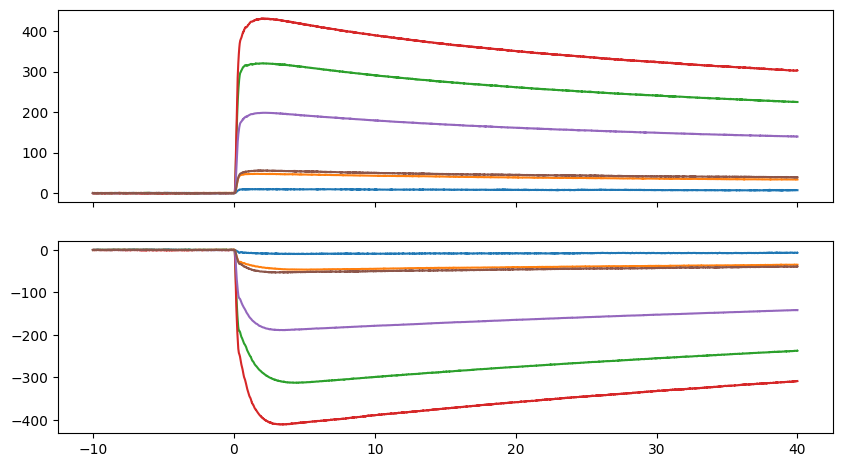

In [152]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [157,158,159,160,161,162,163,164,165]") #147,148,149,150,151,138,122,113,120,124,152,153,154,15
#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Laser Current"
unit ="A"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
  

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
      
        norm_amp_anode=np.average(WF[0:10:1]["Average Anode"].astype(float))
    except:
        print("Issue with normalization")
 
    
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"].astype(float))
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)

print(" step")
#plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=4)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(1, 1, figsize=(9,5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(4,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
njoya_y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=[100*2,200*2,300*2,400*2,500*2,1000*2]
ax.fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    if run["info"]["RN"] in [147,152]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    #print(j,k)   
    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    ydata=run["waveform"]["Average Anode"][::50].diff()[5:]
    xdata=run["waveform"]["Time"][::50][5:]
    #print(len(ydata),len(xdata))
   
    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
    print(fit_cov)
    
    for step_fix in [300,400,800,1500]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 2e-2:
            p0s[1]=8
            print("Bad fit")
            
            ydata=run["waveform"]["Average Anode"][2500:-1000].rolling(step_fix).mean().diff()
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"][2500:-1000]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,25,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[j][k].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    

    
    print(fit_par)
    if rn in [113,147,152]:
        psi = run["info"]["Target Pressure"]
        ax.errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec],label="%d psi on %d"%(psi,run["info"]["Date"]) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec])
    cx.errorbar(x=run["info"]["Cathode Voltage"]+run["info"]["Anode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Laser Current"] ))
    print("\n")
    k=k+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())

ax.legend()
ax.grid()
ax.set_ylabel("Drift Time [uS]")

#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
cx.set_xlim(0,850)
cx.set_title("Cathode Dep @ 16 and 20 psi")
ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Anode")
#plt.xlim(5,15)


In [106]:
#xdata[np.where(ydata==max(ydata))]
np.array(xdata)[np.where(ydata==max(ydata))][0]

11.87799972

In [110]:
WF[0:10:1]["Average Anode"] is np.number

False

      RN  Cathode Voltage  Anode Voltage  Laser Current  Target Pressure
99   100            600.0          200.0           28.0             20.5
101  102           1000.0          200.0           28.0             20.5
102  103           1400.0          200.0           28.0             20.5
103
102
100


Text(80.47222222222221, 0.5, 'Preamp Signal [mV]')

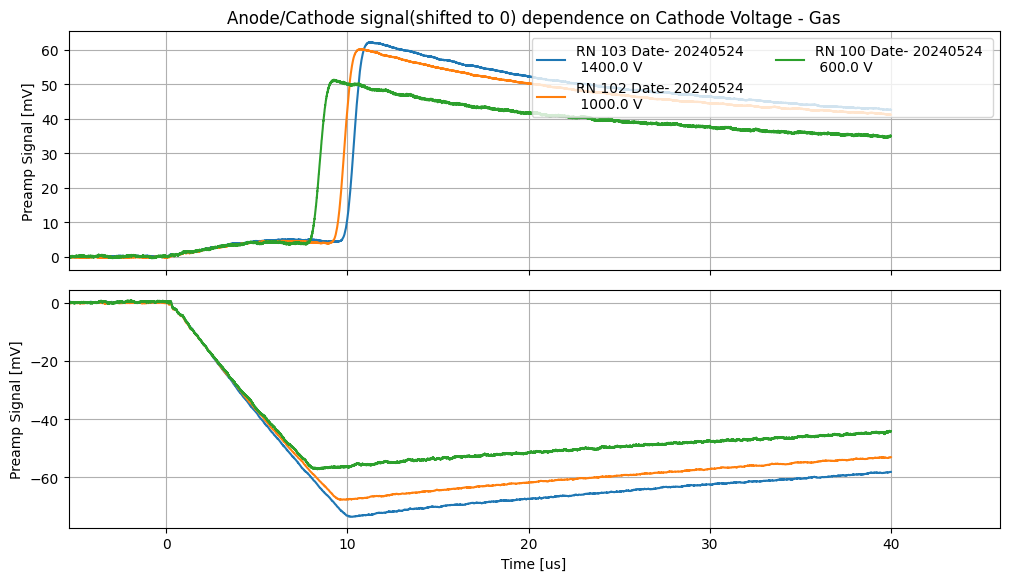

In [107]:
Runlist_q = Runlist.query("RN in [100,102,103]")
print(Runlist_q[["RN","Cathode Voltage","Anode Voltage","Laser Current","Target Pressure"]])
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

   # print(WF.keys())
    
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="RN %d Date- %d \n %s %s"%(int(entry["RN"]),int(entry["Date"]),entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas"%(Label))
plots[0].legend(ncol=2,loc="upper right")

plots[1].set_xlim(-5.4,46)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


In [81]:




WF = WF.replace([np.inf, -np.inf], np.nan)
if not pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]) :
    print("Not")

Not


        RN        Date  Config Number  Run Number    Configuration  \
99   100.0  20240524.0          131.0       100.0  SingleGrid_20mm   
100  101.0  20240524.0          131.0       101.0  SingleGrid_20mm   

           type  Anode Voltage  Cathode Voltage  Laser Current  \
99   Production          200.0            600.0           28.0   
100  Production          200.0            600.0           28.0   

     Laser Frequency  ... Target Pressure  TC1(K)  TC2(K)  TC3(K)  \
99             789.0  ...            20.5   294.0   294.0   294.0   
100            789.0  ...            20.5   294.0   294.0   294.0   

     Drift Length  Filepath (GDrive)  Filepath (ODrive)  Filepath (server)  \
99            NaN                NaN                NaN                NaN   
100           NaN                NaN                NaN                NaN   

     window(us)                     Notes  
99         50.0                       NaN  
100        50.0  High veritcal resolution  

[2 rows x 22 c

TypeError: unsupported operand type(s) for -: 'str' and 'int'

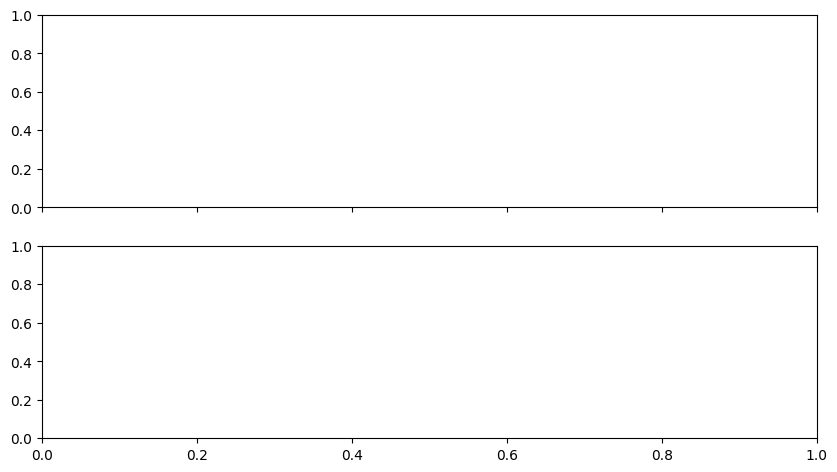

In [69]:
Runlist_q = Runlist.query("RN >= 100 & RN <= 101")
print(Runlist_q)
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]
steps=1
Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)
    WF=WF.dropna()
    print(WF[1:2]["Time"])
     
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)

    norm_amp_anode=0#np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit ) )

    
    norm_amp_cathode=0#np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Room Temp Gas "%(Label))
plots[0].legend(ncol=4)

#plots[1].set_xlim(-5.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


#### Liquid tries on June 6th Runs 215,222,223

run num   215
215
run num   222
222
run num   223
223
 step
Run  215
0 0
[6.0984154, 2.11599999, 5.86399983] 
 ([-1, -1, -50], [9.1476231, 45, 50])
[5.23554027 2.16068324 0.46388239] 
 [[ 3.43250211e-04  1.37837604e-12 -2.02752367e-05]
 [ 1.37837604e-12  2.87430143e-05 -1.22744771e-13]
 [-2.02752367e-05 -1.22744771e-13  3.59287679e-06]]


Run  222
1 0
[5.5956022, 2.14199999, 5.23199986] 
 ([-1, -1, -50], [8.3934033, 45, 50])
[5.03199788 2.18711544 0.42250457] 
 [[ 5.22834019e-04  2.28451598e-12 -2.92660111e-05]
 [ 2.28451598e-12  3.93164671e-05 -1.94102099e-13]
 [-2.92660111e-05 -1.94102099e-13  4.91455838e-06]]


Run  223
2 0
[5.3844386, 2.084, 2.7439999200000003] 
 ([-1, -1, -50], [8.0766579, 45, 50])
[5.80650916 1.59919827 0.27601919] 
 [[ 1.55323232e-04  4.24678049e-13 -4.92231408e-06]
 [ 4.24678049e-13  3.74380733e-06 -2.03445693e-14]
 [-4.92231408e-06 -2.03445693e-14  4.67975916e-07]]




Text(0.5, 0, 'Voltage from Cathode to Grid')

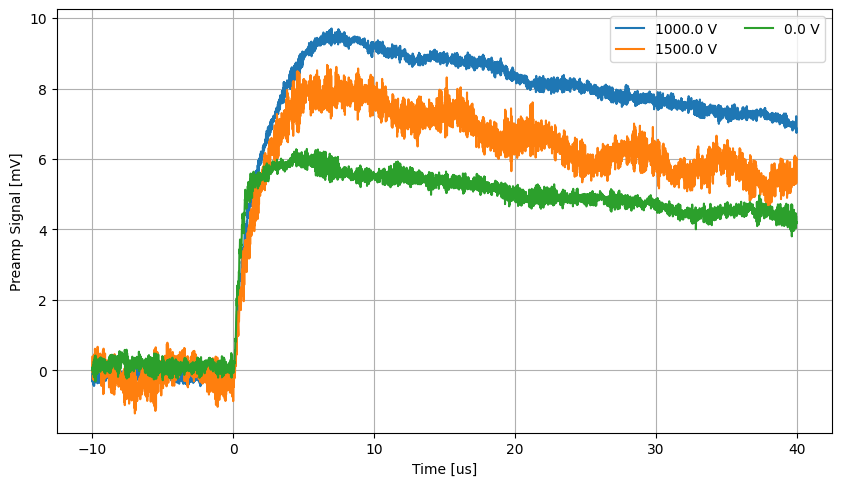

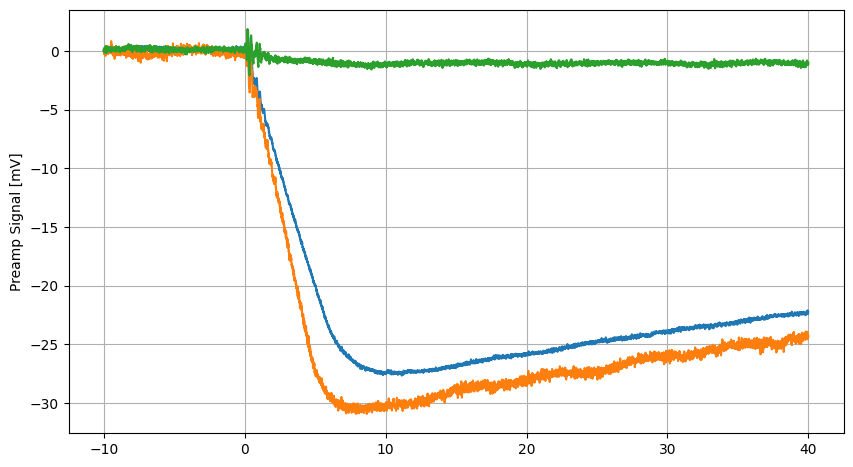

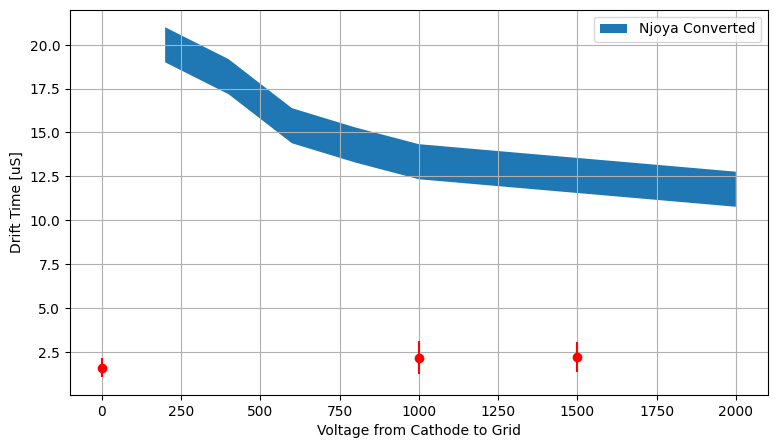

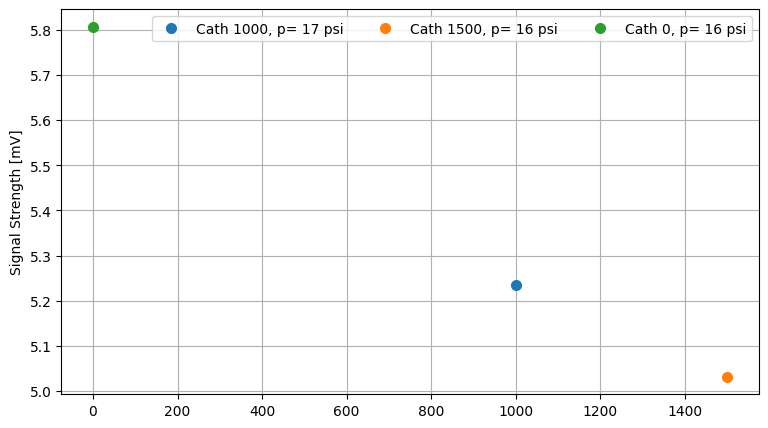

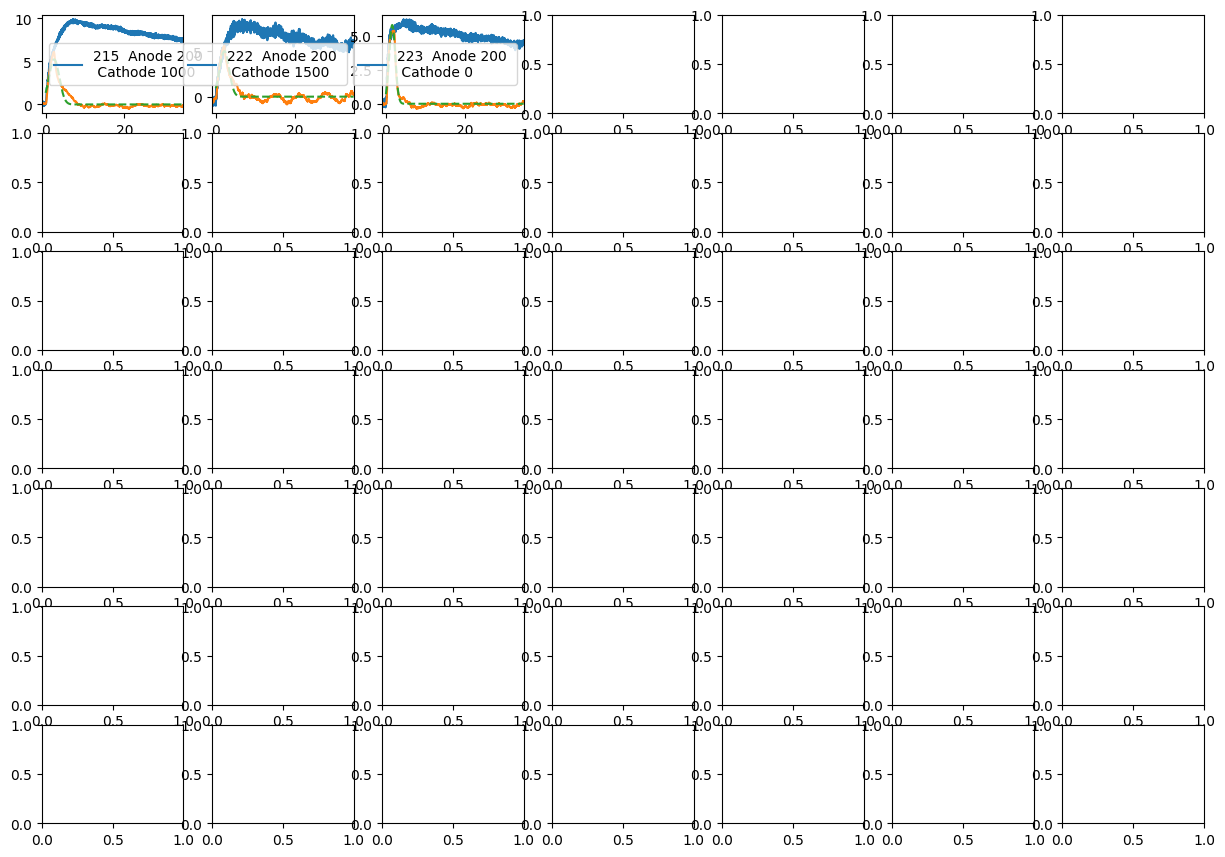

In [288]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [215,222,223]")#,147,148,149,150,151,138,122,113,120,124,152,153,154,155,156]") #147,148,149,150,151,138,122,113,120,124,152,153,154,155


fig, plots = plt.subplots(1, 1, figsize=(10,5.5),sharex=True)
fig_2, plots_2 = plt.subplots(1, 1, figsize=(10,5.5),sharex=True)

Runs=[]

#Label="Laser Current"
Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
  

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots.errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )
    

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots_2.errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)

plots.grid(True)
#plots[0].set_xlabel("Time [us]")
plots.set_ylabel("Preamp Signal [mV]")
plots_2.grid(True)
#plots[0].set_xlabel("Time [us]")
plots_2.set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)

print(" step")
#plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots.legend(ncol=2)

#plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
#plots[1].grid(True)
plots.set_xlabel("Time [us]")
#plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(1, 1, figsize=(9,5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(7,7, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["o","x","p","s","h","*"]
markersize=7

sec=0
njoya_y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=[100*2,200*2,300*2,400*2,500*2,1000*2]
ax.fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Converted")
j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    print("Run ",rn)
    if run["info"]["RN"] in [38,47,113,147,152,168,176,183,189,198,208,219]:
        sec+=1

    if i%7==0:
        k=k+1
    if i%7==0:
        j=0    
    print(j,k)   

    #Fitting update June 3rd - Use a rolling mean to smooth out the orignal data then pipe that rolling mean into a diff. I then fit the diff with a guassian function (amp, mean, stdev)
    stepsize=50
    diffsize=500

    xdata=run["waveform"]["Time"]
    ydata=run["waveform"]["Average Anode"]-np.average(run["waveform"]["Average Anode"][:20])
    yrolling=ydata.rolling(stepsize).mean()
    yprime=yrolling.diff(diffsize)

    timesteps=[ t for t in xdata[::diffsize]]

    amp_guess= np.max(yprime)
    delay_guess_index= np.where(yprime==amp_guess)[0]
    time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
    amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

    sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
    delay_guess=xdata[delay_guess_index]
    p0s=[amp_guess,delay_guess.iloc[0],sigma_guess]
  

    limits=([-1,-1,-50],[max(yprime.fillna(0))*1.5,45,50])
    print(p0s,"\n",limits)

    fit_par,fit_cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0s,bounds=limits)
    
    print(fit_par,"\n",fit_cov)
    xfit=np.arange(-10,40,0.1)
    yfit=gaussian(xfit,fit_par[0],fit_par[1],fit_par[2])
  
    


    if fit_par[0] <=0 or fit_cov[1][1] > 4e-1:
        print("Orginal fit")
        print(fit_par)
        print(fit_cov)

    
    for step_fix in [500,750]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 1e-1:
            p0s[1]=8
            print("Bad fit")
            print(fit_par[0] <=0 , fit_cov[1][1])
            ydata=run["waveform"]["Average Anode"].rolling(20).mean().diff(step_fix)
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,35,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[k][j].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[k][j].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[k][j].errorbar(x=xdata, y=yprime)
    bx[k][j].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,35,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[k][j].errorbar(x=xfit, y=yfit,fmt="--")
    bx[k][j].set_xlim(-1,35)
    

    
   # print(fit_par)
   # print(fit_cov)
    if rn in [33,38,47,113,147,152,168,176,183,189,198,208]:
        psi = run["info"]["Target Pressure"]
        if rn == 198:
            cgt=1
        else:
            cgt=0
        cgtag=["","Cold Gas"]
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*2,c=colors[sec],markersize=markersize-sec*0.5,fmt =marker[sec],label="%d psi on %d %s"%(psi,run["info"]["Date"],cgtag[cgt]) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*2,c=colors[sec], fmt =marker[sec])
    cx.errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],markersize=markersize-sec*0.5,label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
    j=j+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())

ax.legend()
ax.grid()
ax.set_ylabel("Drift Time [uS]")

#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
#cx.set_xlim(0,850)
#cx.set_title(")
#ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Grid")
#plt.xlim(5,15)

#35,36,37,,100,102,103


12502 12503


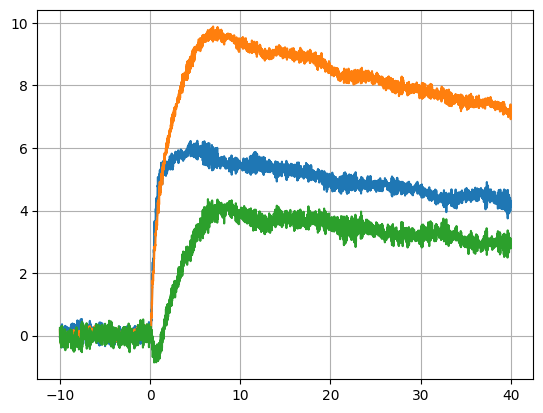

In [303]:
BGRun=GetWaveform(223)
Run1=GetWaveform(215)


bgy = BGRun["Average Anode"] - np.average(BGRun["Average Anode"][:20])

runy= Run1["Average Anode"] - np.average(Run1["Average Anode"][:20])


run_bgs = runy-bgy

print(len(Run1["Time"]),len(run_bgs))


plt.errorbar(BGRun["Time"],BGRun["Average Anode"] - np.average(BGRun["Average Anode"][:20]))
plt.errorbar(Run1["Time"],Run1["Average Anode"] - np.average(Run1["Average Anode"][:20]))
plt.errorbar(x=Run1["Time"], y= run_bgs[:-1])

plt.grid("true")

In [43]:
Runlist_q.sort_values(by=["Date","Cathode Voltage"])

RN      Date  Config Number  Run Number    Configuration        type  \
190  191  20240605            131         191  SingleGrid_20mm  Production   
189  190  20240605            131         190  SingleGrid_20mm  Production   
193  194  20240605            131         194  SingleGrid_20mm  Production   
223  225  20240610            131         225  SingleGrid_20mm  Production   
224  226  20240610            131         226  SingleGrid_20mm  Production   
225  227  20240610            131         227  SingleGrid_20mm  Production   

     Anode Voltage  Cathode Voltage  Laser Current  Laser Frequency  ...  \
190          200.0            500.0           28.0              789  ...   
189          200.0           1000.0           28.0              789  ...   
193          200.0           1500.0           28.0              789  ...   
223          200.0            500.0           28.0              789  ...   
224          200.0           1000.0           28.0              789  ...   
225          200.0           1500.0           28.0              789  ...   

    Target Pressure TC1(K)  TC2(K)  TC3(K)  Drift Length  Filepath (GDrive)  \
190            19.9  295.3   295.0   295.1           NaN                NaN   
189            19.9  295.3   295.1   295.1           NaN                NaN   
193            19.9  295.3   295.0   295.0           NaN                NaN   
223            18.4  203.0   209.8   262.9           NaN                NaN   
224            18.5  205.9   210.6   262.6           NaN                NaN   
225            18.4  204.6   209.6   262.3           NaN                NaN   

     Filepath (ODrive)  Filepath (server)  window(us)  \
190                NaN                NaN        50.0   
189                NaN                NaN        50.0   
193                NaN                NaN        50.0   
223                NaN                NaN        50.0   
224                NaN                NaN        50.0   
225                NaN                NaN        50.0   

                                     Notes  
190                                    NaN  
189                                    NaN  
193                                    NaN  
223  Post temp connection refit - cold gas  
224                                    NaN  
225                                    NaN  

[6 rows x 23 columns]

#### Image 1 for Devins poster june 6

run num   227
227
run num   226
226
run num   225
225
run num   194
194
run num   190
190
run num   191
191


(-1.5, 41.0)

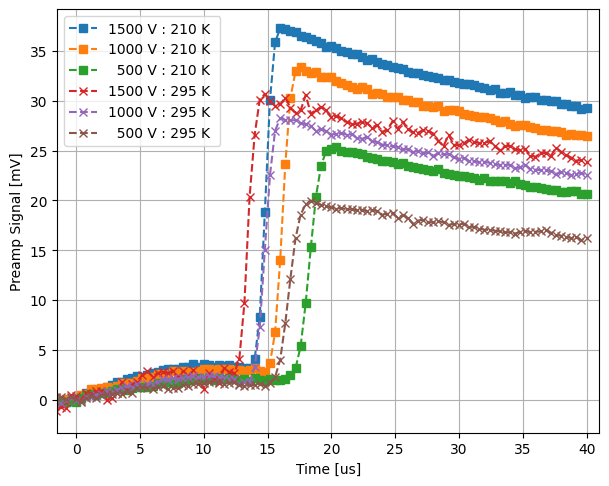

In [62]:

Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [191,190,194,225,226,227]").sort_values(by=["Date","Cathode Voltage"])

colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["s","x","p","s","h","*"]
fig, plots = plt.subplots(1, 1, figsize=(7,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0
sec=0
for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
    if entry["RN"] in [194]:
        sec+=1

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    if Run["info"]["RN"] in [191,225]:
        plots.errorbar(x=WF[::100]["Time"], y= WF[::100]["Average Anode"]-norm_amp_anode,marker=marker[sec], fmt ="--", label="%5i %s : %i K "%(int(entry[Label]), unit, np.round((entry["TC2(K)"])) ) )
    else:
        plots.errorbar(x=WF[::100]["Time"], y= WF[::100]["Average Anode"]-norm_amp_anode,marker=marker[sec], fmt ="--", label="%i %s : %i K "%(int(entry[Label]), unit, np.round((entry["TC2(K)"]))) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    #plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
#plots.set_ylim#plots[1].set_ylabel("Preamp Signal [mV]")

#plots.set_title("Anode Signal")
#plots[1].legend()

#print(Runs," Next step")

plots.grid(True)

plots.set_ylabel("Preamp Signal [mV]")
plots.legend(ncol=1)
plots.set_xlabel("Time [us]")
plots.set_xlim(-1.5,41)


In [81]:
njx=np.array([50,    100 ,200  ,300,400,501,750])
njy=np.array([0.9344,1.05,1.185,1.22,1.354,1.417,1.566])


#### Image 2 for Devins poster june 6

Run  227
0 0
[33.533221999999995, 15.9559996, 2.7999999199999976] 
 ([-1, -1, -50], [50.29983299999999, 45, 50])
[35.5677261  15.93347644  0.2745008 ] 
 [[ 2.26640075e-03  1.00875240e-11 -1.16609238e-05]
 [ 1.00875240e-11  1.43992699e-06 -7.77904528e-14]
 [-1.16609238e-05 -7.77904528e-14  1.79990874e-07]]


Run  226
1 0
[29.178167999999996, 17.2733329, 2.9279999199999995] 
 ([-1, -1, -50], [43.76725199999999, 45, 50])
[30.41392574 17.24625697  0.28415141] 
 [[ 1.33869615e-03  7.54796164e-12 -8.33811882e-06]
 [ 7.54796164e-12  1.24642287e-06 -7.05284110e-14]
 [-8.33811882e-06 -7.05284110e-14  1.55802859e-07]]


Run  225
2 0
[20.668887800000004, 19.36199951, 3.2679999100000003] 
 ([-1, -1, -50], [31.003331700000004, 45, 50])
[21.08668596 19.36680974  0.31356136] 
 [[ 5.87226909e-04  5.35654441e-12 -5.82141952e-06]
 [ 5.35654441e-12  1.38504253e-06 -7.96293266e-14]
 [-5.82141952e-06 -7.96293266e-14  1.73130317e-07]]


Run  194
3 0
[27.2720256, 14.61599964, 2.8199999200000008] 
 ([-1, -1, 

Text(0.5, 0, 'Voltage from Cathode to Grid [V]')

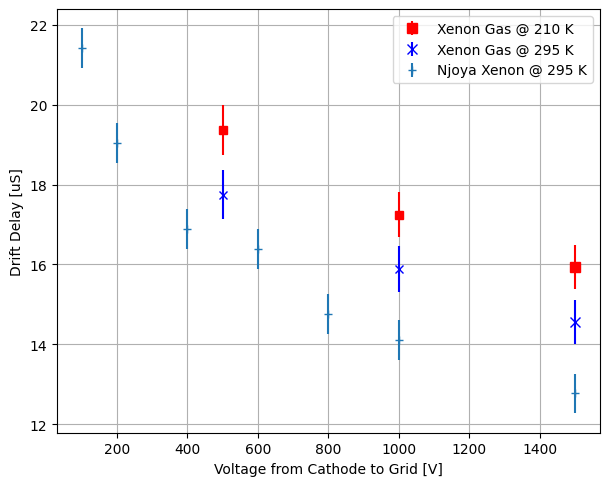

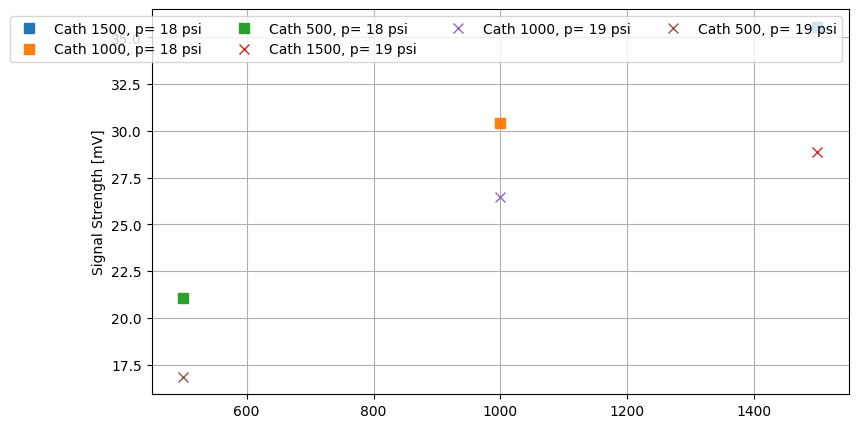

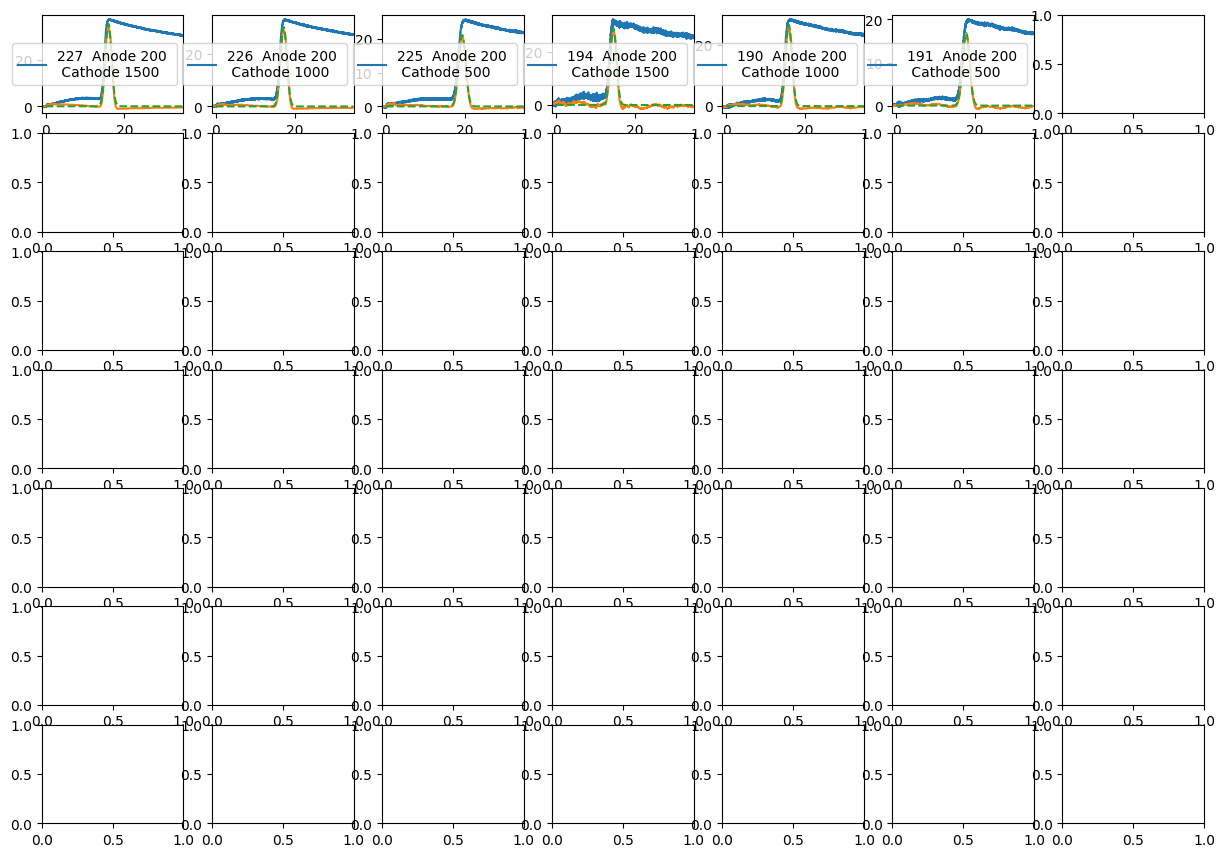

In [90]:
fig,ax= plt.subplots(1, 1, figsize=(7,5.5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(7,7, figsize=(15,10.5))

Label="TC2(K)"
unit ="K"
#print(bx)
colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["s","x","p","s","h","*"]
markersize=7

sec=0
njoya_y1=20/njy -0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y=20/njy
njoya_y2=20/njy +0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=njx*2 #[100*2,200*2,300*2,400*2,500*2,1000*2]
#ax.errorbar(x=njoya_x,y=njoya_y,yerr=0.5,fmt=" ",marker="+",label="Njoya Xenon @ 295 K")
#ax.fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Xenon @ 295 K")

j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    print("Run ",rn)
    if run["info"]["RN"] in [194]:
        sec+=1

    if i%7==0:
        k=k+1
    if i%7==0:
        j=0    
    print(j,k)   

    #Fitting update June 3rd - Use a rolling mean to smooth out the orignal data then pipe that rolling mean into a diff. I then fit the diff with a guassian function (amp, mean, stdev)
    stepsize=50
    diffsize=500

    xdata=run["waveform"]["Time"]
    ydata=run["waveform"]["Average Anode"]-np.average(run["waveform"]["Average Anode"][:20])
    yrolling=ydata.rolling(stepsize).mean()
    yprime=yrolling.diff(diffsize)

    timesteps=[ t for t in xdata[::diffsize]]

    amp_guess= np.max(yprime)
    delay_guess_index= np.where(yprime==amp_guess)[0]
    time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
    amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

    sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
    delay_guess=xdata[delay_guess_index]
    p0s=[amp_guess,delay_guess.iloc[0],sigma_guess]
  

    limits=([-1,-1,-50],[max(yprime.fillna(0))*1.5,45,50])
    print(p0s,"\n",limits)

    fit_par,fit_cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0s,bounds=limits)
    
    print(fit_par,"\n",fit_cov)
    xfit=np.arange(-10,40,0.1)
    yfit=gaussian(xfit,fit_par[0],fit_par[1],fit_par[2])
  
    


    if fit_par[0] <=0 or fit_cov[1][1] > 4e-1:
        print("Orginal fit")
        print(fit_par)
        print(fit_cov)

    
    for step_fix in [500,750]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 1e-1:
            p0s[1]=8
            print("Bad fit")
            print(fit_par[0] <=0 , fit_cov[1][1])
            ydata=run["waveform"]["Average Anode"].rolling(20).mean().diff(step_fix)
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,35,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[k][j].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[k][j].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[k][j].errorbar(x=xdata, y=yprime)
    bx[k][j].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,35,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[k][j].errorbar(x=xfit, y=yfit,fmt="--")
    bx[k][j].set_xlim(-1,35)
    

    
   # print(fit_par)
   # print(fit_cov)
    if rn in [227,194]:
        psi = run["info"]["Target Pressure"]
        if rn == 198:
            cgt=1
        else:
            cgt=0
        cgtag=["","Cold Gas"]
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*2,c=colors[sec],markersize=markersize-sec*0.5,
        fmt =marker[sec],label="Xenon Gas @ %i K"%(np.round(run["info"]["TC2(K)"])) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*2,c=colors[sec], fmt =marker[sec])
    cx.errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],markersize=markersize-sec*0.5,label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
    j=j+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())
ax.errorbar(x=njoya_x,y=njoya_y,yerr=0.5,fmt=" ",marker="+",label="Njoya Xenon @ 295 K")
ax.legend()
ax.grid()
ax.set_ylabel("Drift Delay [uS]")

#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
#cx.set_xlim(0,850)
#cx.set_title(")
#ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Grid [V]")
#plt.xlim(5,15)

#35,36,37,,100,102,103

#### Image 3 for Devins poster june 6

run num   231
231
run num   233
233
run num   235
235
run num   239
239
run num   242
242


(-1.5, 41.0)

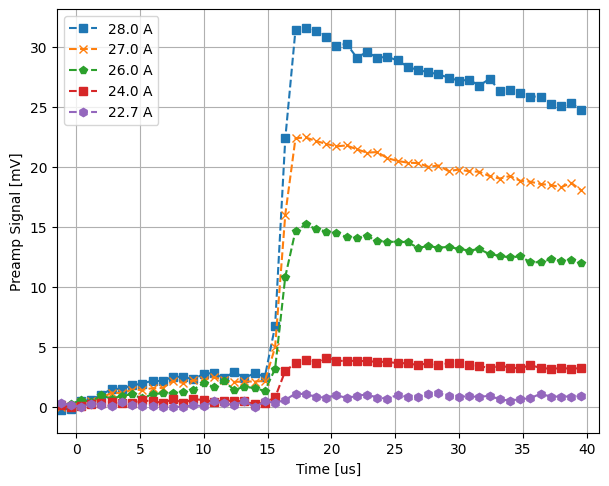

In [114]:

Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [231,233,235,239,242]").sort_values(by=["Date","Laser Current"])

colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["s","x","p","s","h","*"]
fig, plots = plt.subplots(1, 1, figsize=(7,5.5),sharex=True)

Runs=[]

Label="Laser Current"
unit ="A"

norm_amp_anode=0
norm_amp_cathode=0
sec=0
for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print("run num  ",entry["RN"])
    
    WF=GetWaveform(entry)
    if entry["RN"] in [194]:
        sec+=1

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    if Run["info"]["RN"] in [191,225]:
        plots.errorbar(x=WF[::200]["Time"], y= WF[::200]["Average Anode"]-norm_amp_anode,marker=marker[i], fmt ="--", label="%.1f %s"%((entry[Label]), unit, ) )
    else:
        plots.errorbar(x=WF[::200]["Time"], y= WF[::200]["Average Anode"]-norm_amp_anode, fmt ="--",marker=marker[i], label="%.1f %s"%((entry[Label]), unit))

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    #plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
#plots.set_ylim#plots[1].set_ylabel("Preamp Signal [mV]")

#plots.set_title("Anode Signal")
#plots[1].legend()

#print(Runs," Next step")

plots.grid(True)

plots.set_ylabel("Preamp Signal [mV]")
plots.legend(ncol=1)
plots.set_xlabel("Time [us]")
plots.set_xlim(-1.5,41)


Run  231
0 0
[27.8913602, 17.26399957, 2.9399999200000018] 
 ([-1, -1, -50], [41.8370403, 45, 50])
[28.99977977 17.22930757  0.28493877] 
 [[ 1.34499411e-03  7.92847277e-12 -8.81020393e-06]
 [ 7.92847277e-12  1.38504156e-06 -7.78937225e-14]
 [-8.81020393e-06 -7.78937225e-14  1.73130195e-07]]


Run  233
1 0
[19.7032422, 17.25999957, 2.92399992] 
 ([-1, -1, -50], [29.554863299999997, 45, 50])
[20.51628894 17.23976302  0.28440323] 
 [[ 6.19612811e-04  5.17276978e-12 -5.72617787e-06]
 [ 5.17276978e-12  1.27004920e-06 -7.16833039e-14]
 [-5.72617787e-06 -7.16833039e-14  1.58756150e-07]]


Run  235
2 0
[12.98873, 17.26799957, 2.89199992] 
 ([-1, -1, -50], [19.483095, 45, 50])
[13.65040674 17.25991079  0.28302761] 
 [[ 3.61044891e-04  4.53458344e-12 -4.99060440e-06]
 [ 4.53458344e-12  1.65560356e-06 -9.39977036e-14]
 [-4.99060440e-06 -9.39977036e-14  2.06950445e-07]]


Run  239
3 0
[3.3813606, 17.26799957, 2.89199992] 
 ([-1, -1, -50], [5.072040899999999, 45, 50])
[ 3.544429   17.24711073  0.2

(12.0, 18.0)

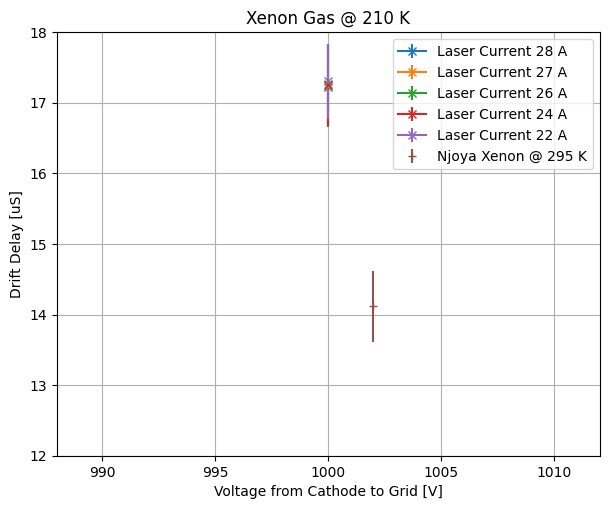

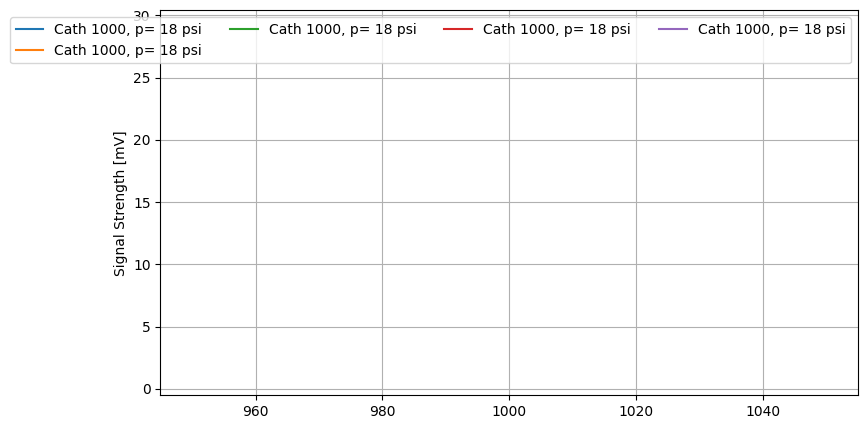

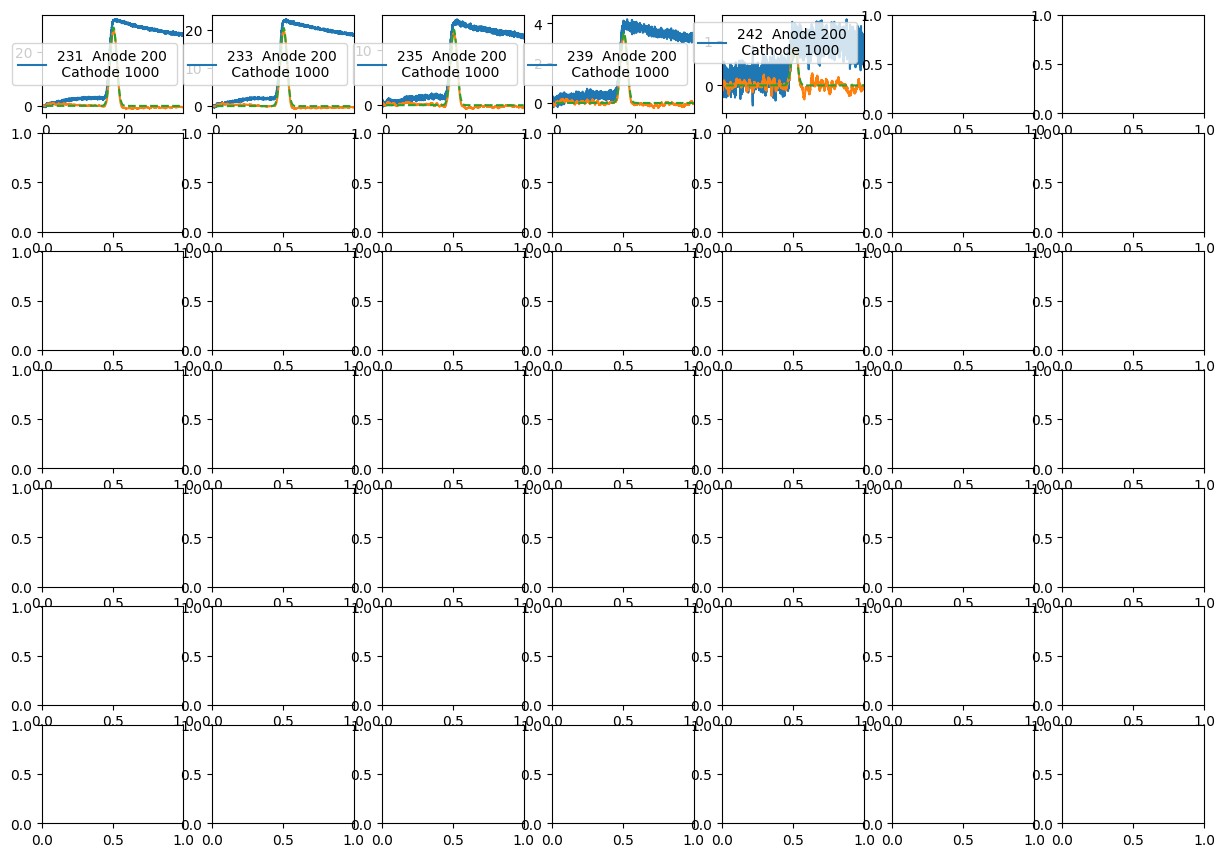

In [111]:
fig,ax= plt.subplots(1, 1, figsize=(7,5.5))
fig,cx= plt.subplots(1, 1, figsize=(9,5))

fig2,bx= plt.subplots(7,7, figsize=(15,10.5))

Label="TC2(K)"
unit ="K"
#print(bx)
colors=["r","blue","darkgrey","green","cyan","purple"]
marker=["s","x","p","s","h","*"]
markersize=7

sec=0
njoya_y1=20/njy -0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
njoya_y=20/njy
njoya_y2=20/njy +0.1#np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1
njoya_x=njx*2 #[100*2,200*2,300*2,400*2,500*2,1000*2]
#ax.fill_between(x=njoya_x,y1=njoya_y1, y2=njoya_y2, label="Njoya Xenon @ 295 K")

j=-1
k=-1

for i,run in enumerate(Runs):
    rn = run["info"]["RN"]
    print("Run ",rn)
    if run["info"]["RN"] in [194]:
        sec+=1

    if i%7==0:
        k=k+1
    if i%7==0:
        j=0    
    print(j,k)   

    #Fitting update June 3rd - Use a rolling mean to smooth out the orignal data then pipe that rolling mean into a diff. I then fit the diff with a guassian function (amp, mean, stdev)
    stepsize=50
    diffsize=500

    xdata=run["waveform"]["Time"]
    ydata=run["waveform"]["Average Anode"]-np.average(run["waveform"]["Average Anode"][:20])
    yrolling=ydata.rolling(stepsize).mean()
    yprime=yrolling.diff(diffsize)

    timesteps=[ t for t in xdata[::diffsize]]

    amp_guess= np.max(yprime)
    delay_guess_index= np.where(yprime==amp_guess)[0]
    time_82=xdata[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]
    amp_82=yprime[np.where(round(abs(yprime -amp_guess)/amp_guess,2) ==0.82)[0]]

    sigma_guess= time_82.iloc[-1] - time_82.iloc[0]
    delay_guess=xdata[delay_guess_index]
    p0s=[amp_guess,delay_guess.iloc[0],sigma_guess]
  

    limits=([-1,-1,-50],[max(yprime.fillna(0))*1.5,45,50])
    print(p0s,"\n",limits)

    fit_par,fit_cov = curve_fit(gaussian,xdata,yprime.fillna(0),p0=p0s,bounds=limits)
    
    print(fit_par,"\n",fit_cov)
    xfit=np.arange(-10,40,0.1)
    yfit=gaussian(xfit,fit_par[0],fit_par[1],fit_par[2])
  
    


    if fit_par[0] <=0 or fit_cov[1][1] > 4e-1:
        print("Orginal fit")
        print(fit_par)
        print(fit_cov)

    
    for step_fix in [500,750]:
        
        if fit_par[0] <=0 or fit_cov[1][1] > 1e-1:
            p0s[1]=8
            print("Bad fit")
            print(fit_par[0] <=0 , fit_cov[1][1])
            ydata=run["waveform"]["Average Anode"].rolling(20).mean().diff(step_fix)
            ydata=ydata.fillna(0)
            xdata=run["waveform"]["Time"]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            print(fit_cov[1][1])
            xfit=np.arange(0,35,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[k][j].errorbar(x=xfit, y=yfit,fmt="-.",c="grey")


        else:
            break

    bx[k][j].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[k][j].errorbar(x=xdata, y=yprime)
    bx[k][j].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,35,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[k][j].errorbar(x=xfit, y=yfit,fmt="--")
    bx[k][j].set_xlim(-1,35)
    

    
   # print(fit_par)
   # print(fit_cov)
    if rn in [231]:
        psi = run["info"]["Target Pressure"]
        if rn == 198:
            cgt=1
        else:
            cgt=0
        cgtag=["","Cold Gas"]
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"],marker="x", yerr=run["Drifttime_stdev"]*2,label="Laser Current %i A"%((run["info"]["Laser Current"])) )    
    else:
        ax.errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"],marker="x", yerr=run["Drifttime_stdev"]*2,label="Laser Current %i A"%((run["info"]["Laser Current"])) )
    cx.errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],
    label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
    j=j+1
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
cx.grid()
#ax[0].set_xlim(0,25)


#print(ax[1].get_legend_handles_labels())
ax.errorbar(x=njoya_x,y=njoya_y,yerr=0.5,fmt=" ",marker="+",label="Njoya Xenon @ 295 K")
ax.legend()
ax.grid()
ax.set_ylabel("Drift Delay [uS]")
ax.set_title("Xenon Gas @ 210 K")
#ax[2].grid()
cx.set_ylabel("Signal Strength [mV]")
cx.legend(ncol=4)
#cx.set_xlim(0,850)
#cx.set_title(")
#ax.set_xlim(0,850)
ax.set_xlabel("Voltage from Cathode to Grid [V]")
ax.set_xlim(988,1012)
ax.set_ylim(12,18)
#35,36,37,,100,102,103